### Importing libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import precision_score, recall_score, f1_score

In [191]:
df = pd.read_excel("Consumer creditworthiness train data.xlsx")

In [192]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


#### null value fixing

In [194]:
df_exp = df.copy()

In [195]:
df_exp.fillna(df_exp.mean(),inplace=True)

C:\Users\Rachit Pahwa\AppData\Local\Temp\ipykernel_27876\3906118080.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_exp.fillna(df_exp.mean(),inplace=True)


In [196]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   521 non-null    float64
 10  Credit_History     521 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [197]:
df['Dependents'].value_counts()

0     299
1      84
2      84
3+     41
Name: Dependents, dtype: int64

In [198]:
df_exp.fillna(df_exp.mode(),inplace=True)

In [199]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   521 non-null    float64
 10  Credit_History     521 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [200]:
df_exp = df_exp.apply(lambda x: x.fillna(x.mode()[0]))

In [201]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             521 non-null    object 
 2   Married            521 non-null    object 
 3   Dependents         521 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      521 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   521 non-null    float64
 10  Credit_History     521 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [202]:
df_exp.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [203]:
df_exp.Married.unique()

array(['No', 'Yes'], dtype=object)

In [204]:
df_exp.Dependents.unique()

array([0, 1, 2, '3+'], dtype=object)

In [205]:
df_exp.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [206]:
df_exp.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [207]:
df_exp.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [208]:
df_exp.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [209]:
map_dict = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Y': 1, 'N': 2, 'Urban': 1, 'Rural': 2, 'Semiurban': 3, 0: 0, 1: 1, 2: 2, '3+': 3,'Graduate': 1, 'Not Graduate': 2}
# map_dict = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2}


In [210]:
df_exp['Gender'] = df_exp['Gender'].map(map_dict).astype(float)
df_exp['Education'] = df_exp['Education'].map(map_dict).astype(float)
df_exp['Self_Employed'] = df_exp['Self_Employed'].map(map_dict).astype(float)
df_exp['Property_Area'] = df_exp['Property_Area'].map(map_dict).astype(float)
df_exp['Loan_Status'] = df_exp['Loan_Status'].map(map_dict).astype(float)
df_exp['Dependents'] = df_exp['Dependents'].map(map_dict).astype(float)
df_exp['Married'] = df_exp['Married'].map(map_dict).astype(float)

In [211]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             521 non-null    float64
 2   Married            521 non-null    float64
 3   Dependents         521 non-null    float64
 4   Education          521 non-null    float64
 5   Self_Employed      521 non-null    float64
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   521 non-null    float64
 10  Credit_History     521 non-null    float64
 11  Property_Area      521 non-null    float64
 12  Loan_Status        521 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 53.0 KB


In [212]:
df_exp.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02,5.210000e+02,5.210000e+02,521.000000,521.000000,521.000000,521.000000
mean,547517.817658,1.184261,1.351248,0.719770,1.216891,1.871401,1.229406e+06,3.495994e+05,2.797044e+05,343.266272,0.847280,2.040307,1.312860
std,261344.261339,0.388070,0.477819,0.999121,0.412524,0.335077,1.449755e+06,4.824296e+05,1.712505e+05,62.745871,0.344884,0.845979,0.464103
min,101559.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000,1.000000,1.000000
25%,314492.000000,1.000000,1.000000,0.000000,1.000000,2.000000,6.468750e+05,0.000000e+00,1.960000e+05,360.000000,1.000000,1.000000,1.000000
50%,543412.000000,1.000000,1.000000,0.000000,1.000000,2.000000,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000,2.000000,1.000000
75%,783776.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000,3.000000,2.000000
max,998791.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.822500e+07,4.500000e+06,1.400000e+06,480.000000,1.000000,3.000000,2.000000


<AxesSubplot:>

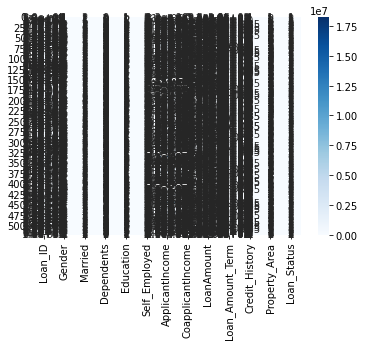

In [213]:
sns.heatmap(df_exp, annot = True, cmap = 'Blues')

In [214]:
df_exp.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.001102,-0.079488,0.112165,0.047249,0.046692,0.083359,-0.057529,-0.009990,0.062750,-0.041038,-0.029581,0.098637
Gender,-0.001102,1.000000,0.376265,-0.169121,-0.045906,0.005109,-0.073061,-0.171424,-0.133736,0.084998,-0.008056,0.065199,0.020986
Married,-0.079488,0.376265,1.000000,-0.341264,-0.026254,-0.005602,-0.044226,-0.184355,-0.113700,0.104848,-0.008545,-0.025577,0.093195
Dependents,0.112165,-0.169121,-0.341264,1.000000,0.096424,-0.015943,0.109942,0.023676,0.129713,-0.102573,-0.050263,0.004288,-0.017926
Education,0.047249,-0.045906,-0.026254,0.096424,1.000000,0.007397,-0.148278,-0.062170,-0.173364,-0.103233,-0.113847,-0.019588,0.106943
Self_Employed,0.046692,0.005109,-0.005602,-0.015943,0.007397,1.000000,-0.082533,-0.025207,-0.050800,0.062958,-0.002715,-0.002031,-0.000475
ApplicantIncome,0.083359,-0.073061,-0.044226,0.109942,-0.148278,-0.082533,1.000000,-0.113610,0.546241,-0.069810,-0.032394,-0.007563,0.022277
CoapplicantIncome,-0.057529,-0.171424,-0.184355,0.023676,-0.062170,-0.025207,-0.113610,1.000000,0.230166,0.002878,-0.021069,0.060026,0.005760
LoanAmount,-0.009990,-0.133736,-0.113700,0.129713,-0.173364,-0.050800,0.546241,0.230166,1.000000,0.032412,-0.021580,0.044975,0.045397
Loan_Amount_Term,0.062750,0.084998,0.104848,-0.102573,-0.103233,0.062958,-0.069810,0.002878,0.032412,1.000000,0.018816,0.101670,0.053042


<AxesSubplot:>

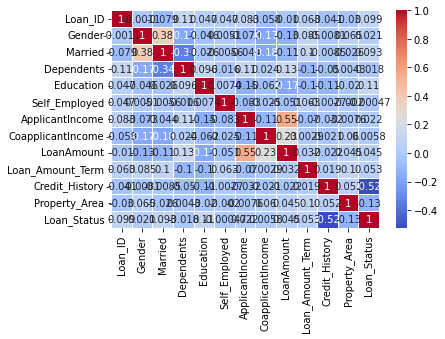

In [26]:
sns.heatmap(df_exp.corr(), annot=True, cmap='coolwarm', linewidth = 1)

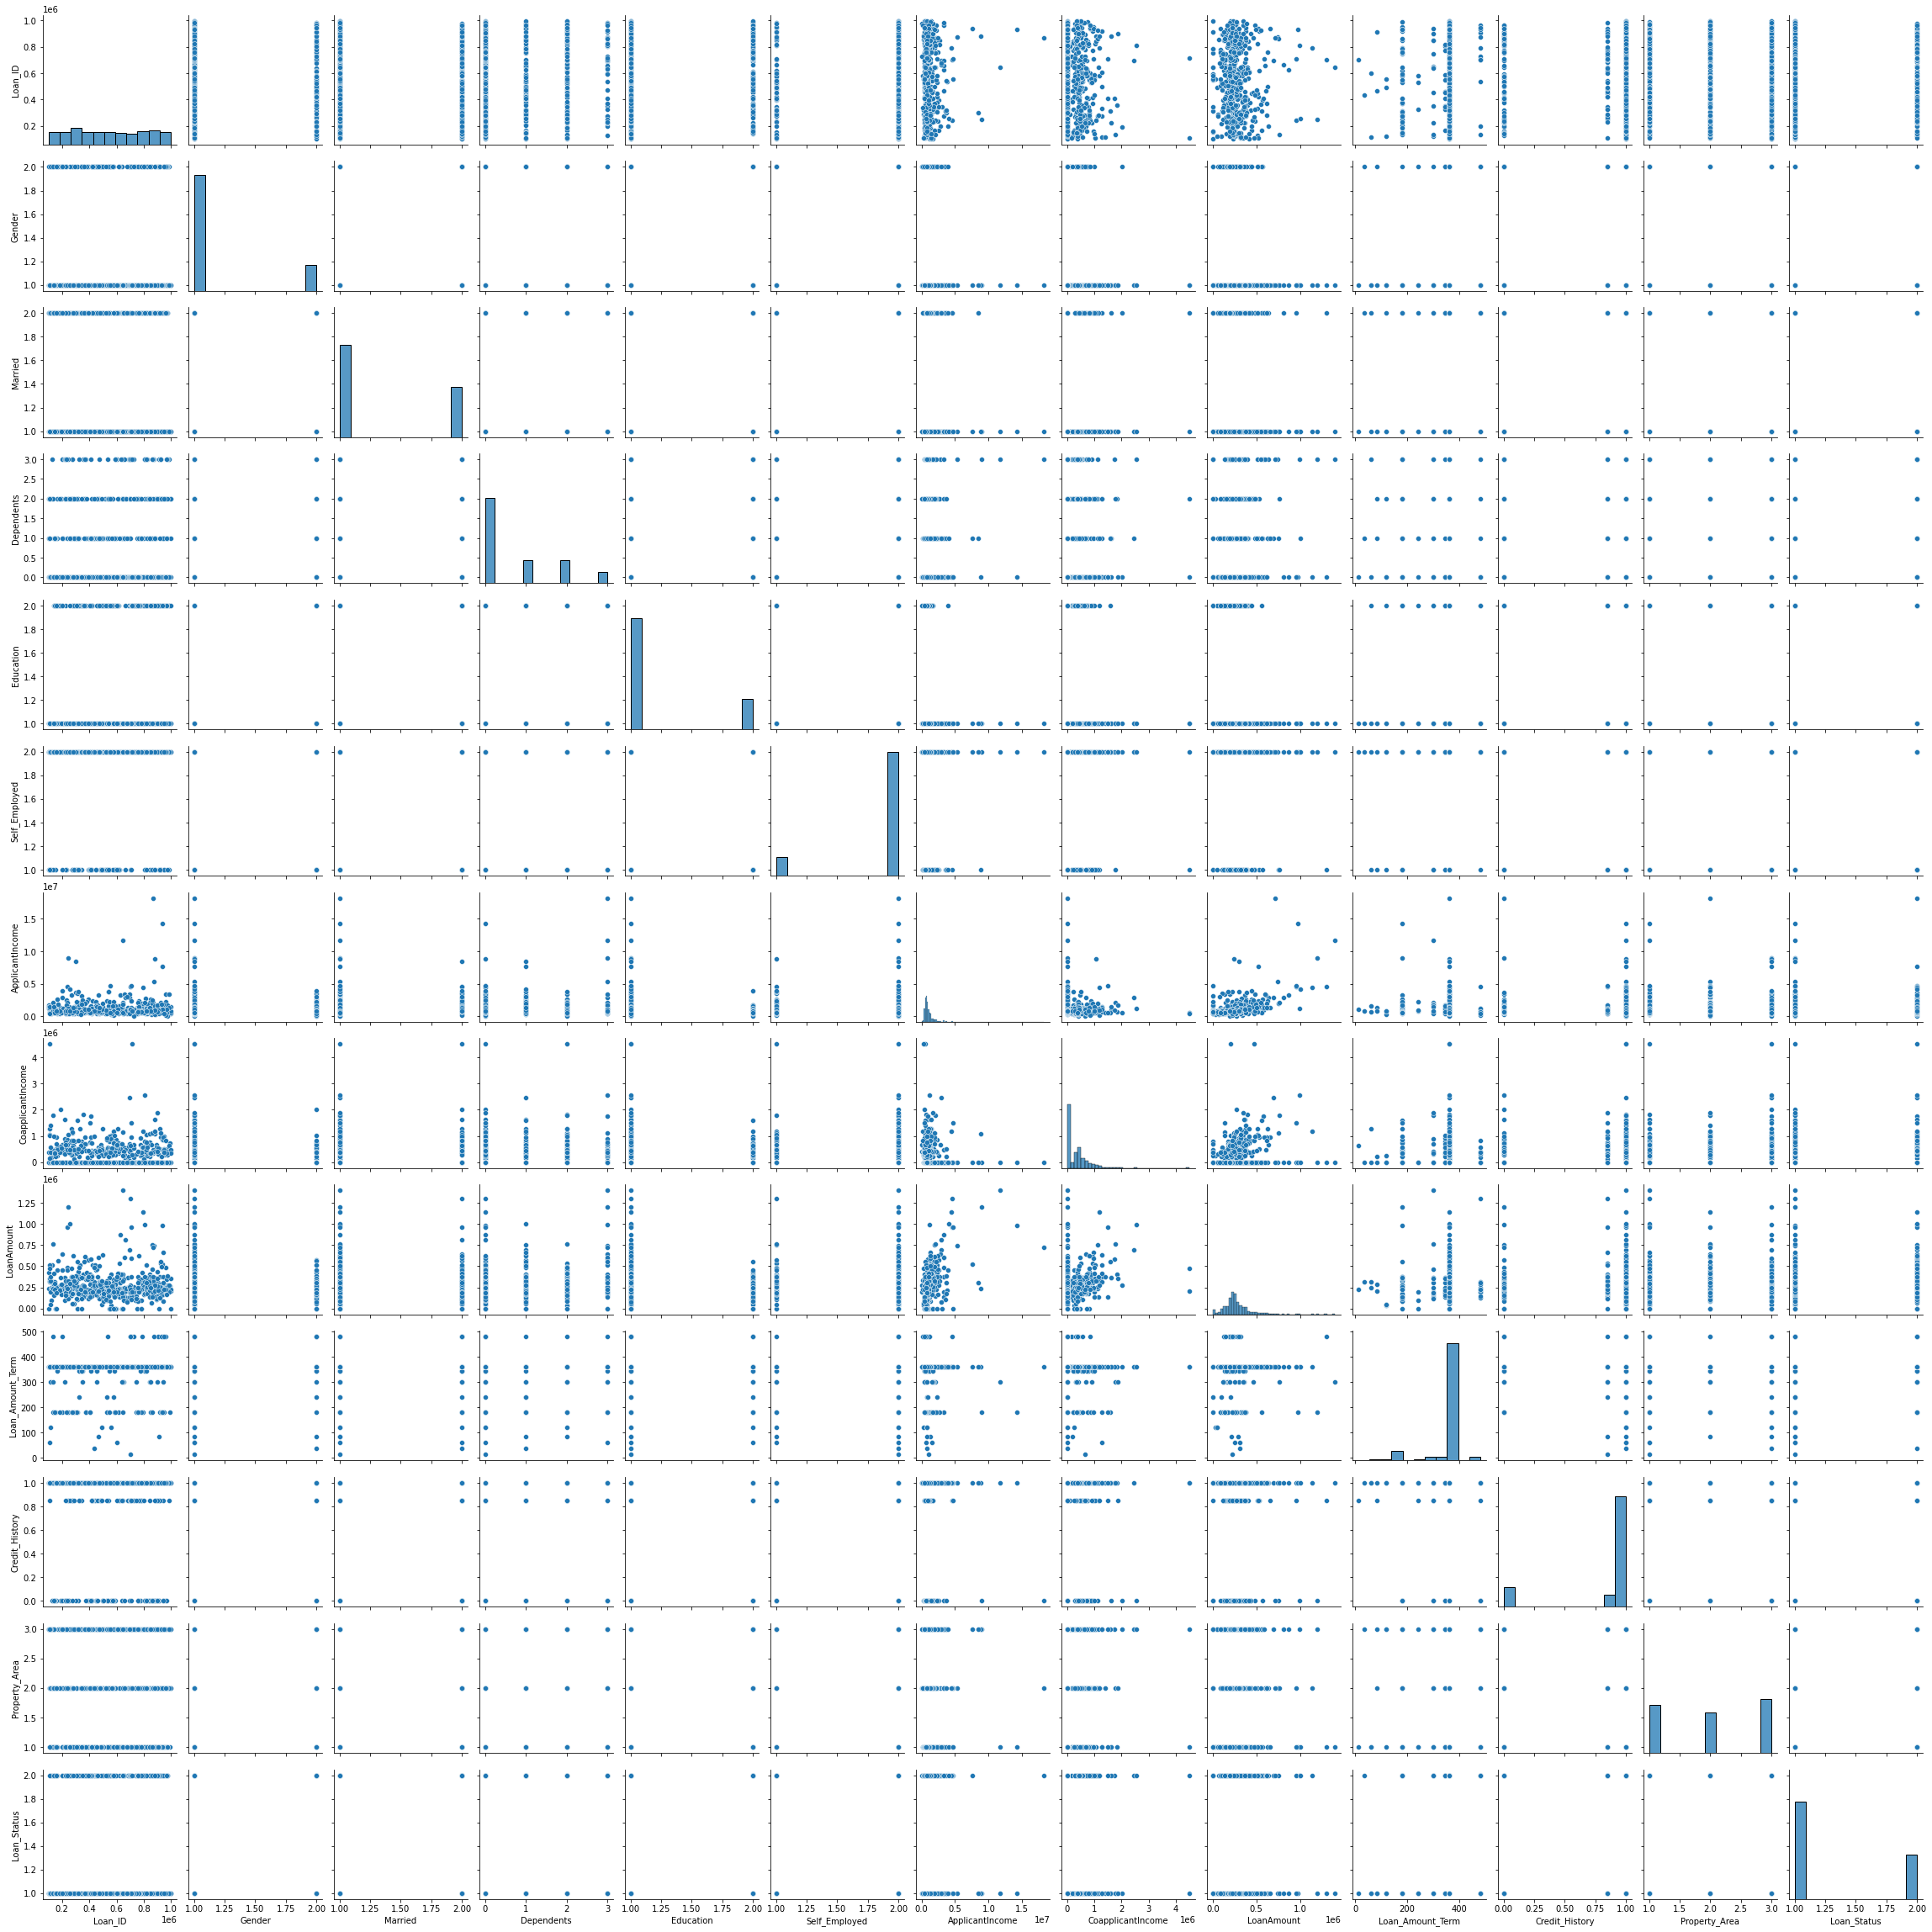

In [27]:
sns.pairplot(df_exp)

array([[<AxesSubplot:xlabel='Loan_ID', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Gender', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Married', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Dependents', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Education', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Self_Employed', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Property_Area', ylabel='Loan_ID'>,
        <AxesSubplot:xlabel='Loan_Status', ylabel='Loan_ID'>],
       [<AxesSubplot:xlabel='Loan_ID', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Married', ylabel='Gender'>,
        <AxesSubpl

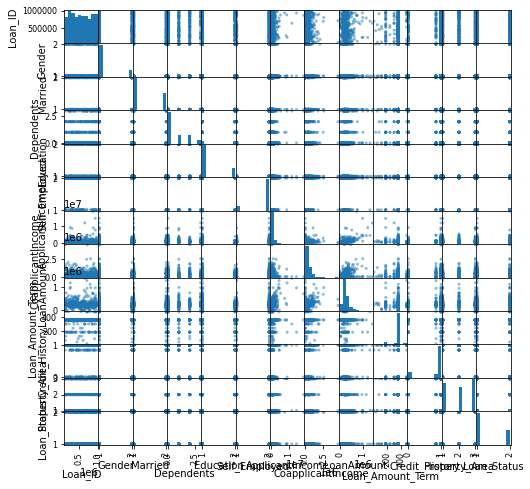

In [28]:
pd.plotting.scatter_matrix(df_exp, figsize=(8, 8))

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

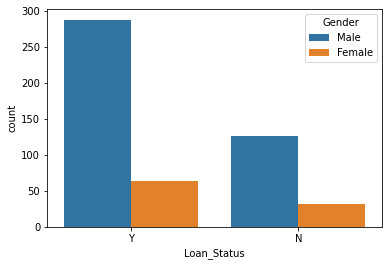

In [29]:
sns.countplot(df['Loan_Status'], hue = df['Gender'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

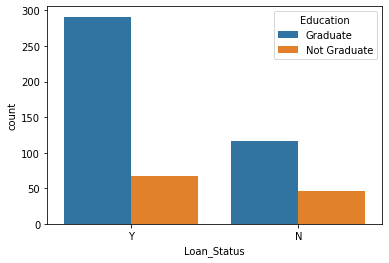

In [30]:
sns.countplot(df['Loan_Status'], hue = df['Education'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

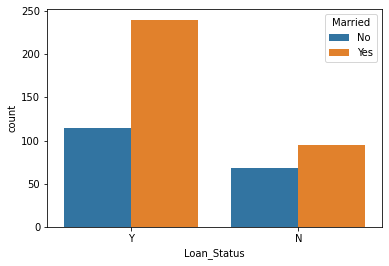

In [31]:
sns.countplot(df['Loan_Status'], hue = df['Married'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

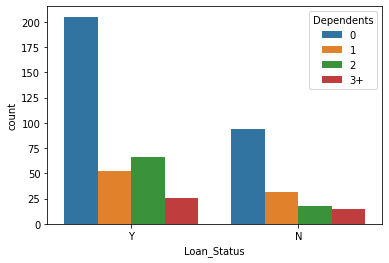

In [32]:
sns.countplot(df['Loan_Status'], hue = df['Dependents'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

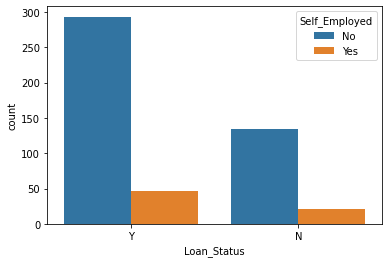

In [33]:
sns.countplot(df['Loan_Status'], hue = df['Self_Employed'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

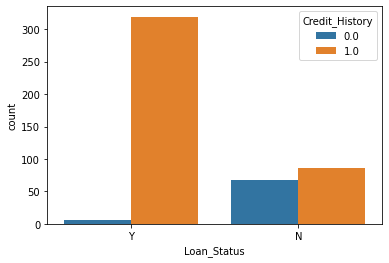

In [34]:
sns.countplot(df['Loan_Status'], hue = df['Credit_History'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

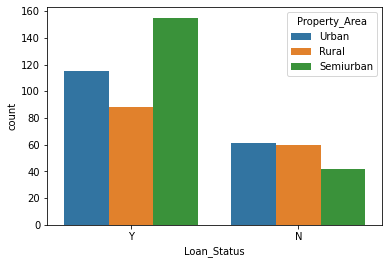

In [35]:
sns.countplot(df['Loan_Status'], hue = df['Property_Area'])

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

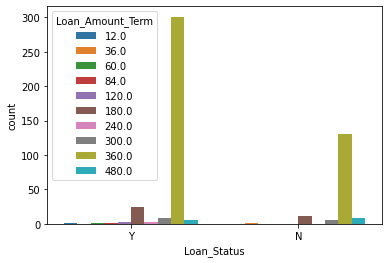

In [36]:
sns.countplot(df['Loan_Status'], hue = df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

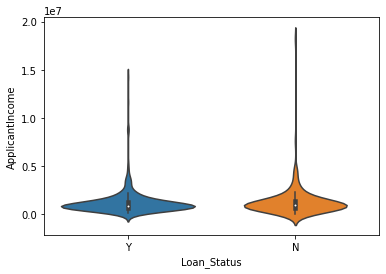

In [37]:
sns.violinplot(x = df['Loan_Status'], y = df['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

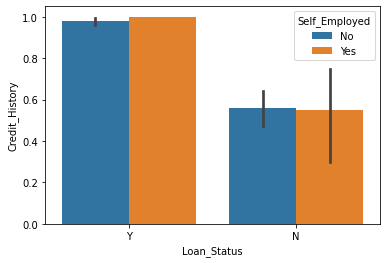

In [38]:
sns.barplot(y = df['Credit_History'], x = df['Loan_Status'], hue = df['Self_Employed'])   


C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

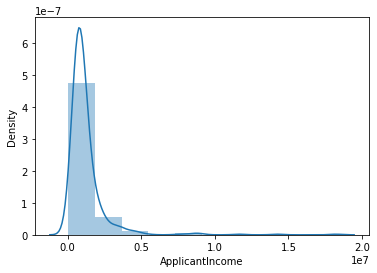

In [39]:
sns.distplot(df['ApplicantIncome'], bins = 10, kde = True) 

C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

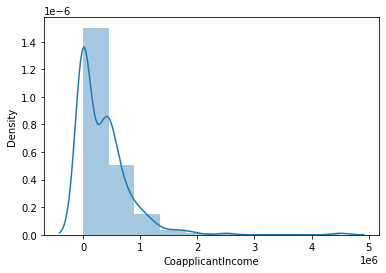

In [40]:
sns.distplot(df['CoapplicantIncome'], bins = 10, kde = True) 

In [215]:
df.Loan_Status.value_counts()

Y    358
N    163
Name: Loan_Status, dtype: int64

In [216]:
counts = df.groupby('Married')['Loan_Status'].value_counts()


In [217]:
counts

Married  Loan_Status
No       Y              115
         N               68
Yes      Y              240
         N               95
Name: Loan_Status, dtype: int64

In [218]:
counts_df = counts.unstack()


In [219]:
counts_df

Loan_Status,N,Y
Married,,
No,68,115
Yes,95,240


In [220]:
counts = df.groupby('Married')['Loan_Status'].value_counts(normalize=True)
counts_df = counts.unstack()
counts_df

Loan_Status,N,Y
Married,,
No,0.371585,0.628415
Yes,0.283582,0.716418


In [221]:
counts = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Gender,,
Female,0.333333,0.666667
Male,0.306024,0.693976


In [222]:
bins = pd.cut(df['ApplicantIncome'], bins=10)  # create 10 equal-width bins
# counts = df.groupby(bins)['Loan_Status'].value_counts()
# counts_df = counts.unstack(fill_value=0)


In [223]:
bins

0      (15558.75, 1852875.0]
1      (15558.75, 1852875.0]
2      (15558.75, 1852875.0]
3      (15558.75, 1852875.0]
4      (15558.75, 1852875.0]
               ...          
516    (15558.75, 1852875.0]
517    (15558.75, 1852875.0]
518    (15558.75, 1852875.0]
519    (15558.75, 1852875.0]
520    (15558.75, 1852875.0]
Name: ApplicantIncome, Length: 521, dtype: category
Categories (10, interval[float64, right]): [(15558.75, 1852875.0] < (1852875.0, 3672000.0] < (3672000.0, 5491125.0] < (5491125.0, 7310250.0] ... (10948500.0, 12767625.0] < (12767625.0, 14586750.0] < (14586750.0, 16405875.0] < (16405875.0, 18225000.0]]

In [224]:
counts = df.groupby('Dependents')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Dependents,,
0,0.314381,0.685619
1,0.380952,0.619048
2,0.214286,0.785714
3+,0.365854,0.634146


In [225]:
counts = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Education,,
Graduate,0.286765,0.713235
Not Graduate,0.407080,0.592920


In [226]:
counts = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Self_Employed,,
No,0.313817,0.686183
Yes,0.313433,0.686567


In [227]:
counts = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,NaN,1.000000
36.0,1.000000,NaN
60.0,NaN,1.000000
84.0,NaN,1.000000
120.0,NaN,1.000000
180.0,0.333333,0.666667
240.0,NaN,1.000000
300.0,0.384615,0.615385
360.0,0.303241,0.696759


In [228]:
counts = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Credit_History,,
0.0,0.917808,0.082192
1.0,0.212346,0.787654


In [229]:
counts = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Property_Area,,
Rural,0.405405,0.594595
Semiurban,0.213198,0.786802
Urban,0.346591,0.653409


In [230]:
counts = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,NaN,1.000000
36.0,1.000000,NaN
60.0,NaN,1.000000
84.0,NaN,1.000000
120.0,NaN,1.000000
180.0,0.333333,0.666667
240.0,NaN,1.000000
300.0,0.384615,0.615385
360.0,0.303241,0.696759


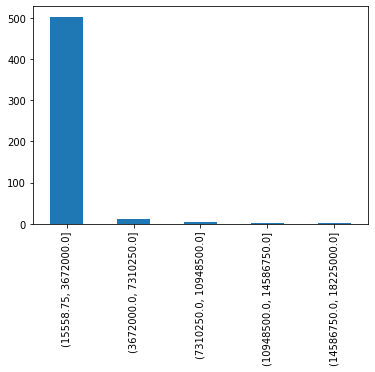

In [57]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # create a DataFrame with a continuous column
# df = pd.DataFrame({'col1': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

# # bin the values into 5 equal-width bins
bins = pd.cut(df['ApplicantIncome'], bins=5)

# count the occurrences of values in each bin
counts = bins.value_counts()

# plot a bar chart of the counts
counts.plot(kind='bar')
plt.show()


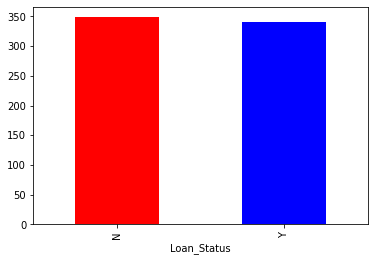

In [58]:
means = df.groupby('Loan_Status')['Loan_Amount_Term'].mean()

# plot a grouped bar chart of the means
means.plot(kind='bar', color=['red', 'blue'])
plt.show()

In [231]:
counts = df.groupby('Loan_ID')['Loan_Status'].value_counts(normalize=True).unstack()
counts

Loan_Status,N,Y
Loan_ID,,
101559,NaN,1.0
102013,NaN,1.0
104139,NaN,1.0
106536,NaN,1.0
109205,1.0,NaN
...,...,...
990456,NaN,1.0
995414,NaN,1.0
998081,NaN,1.0


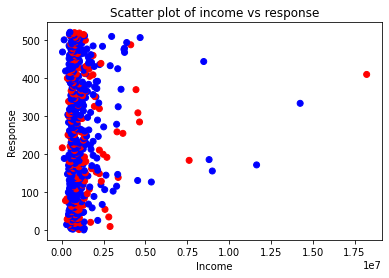

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map response to color
color_dict = {'Y': 'blue', 'N': 'red'}

# Create the scatter plot
plt.scatter(x=df['ApplicantIncome'], y=range(len(df)), c=df['Loan_Status'].map(color_dict))

# Set the labels and title
plt.xlabel('Income')
plt.ylabel('Response')
plt.title('Scatter plot of income vs response')

# Show the plot
plt.show()


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

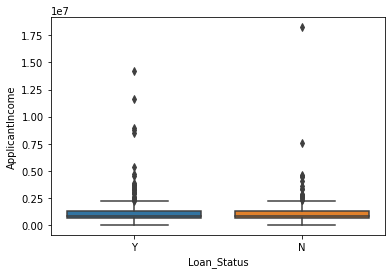

In [233]:
sns.boxplot(x = df['Loan_Status'], y = df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

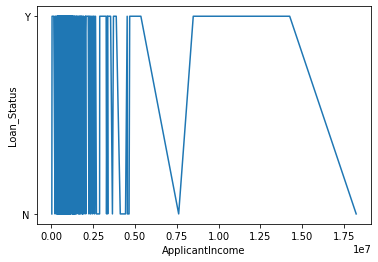

In [234]:
sns.lineplot(x = df['ApplicantIncome'], y = df['Loan_Status'])

In [235]:
grouped_data = df.groupby('Loan_Status')['ApplicantIncome'].mean()

# Print the mean income for each group
print("Mean Salary - ", grouped_data)

Mean Salary -  Loan_Status
N    1.277224e+06
Y    1.207635e+06
Name: ApplicantIncome, dtype: float64


In [236]:
grouped_data = df.groupby('Loan_Status')['ApplicantIncome'].median()

# Print the mean income for each group
print("Median Salary - ", grouped_data)

Median Salary -  Loan_Status
N    888300.0
Y    852075.0
Name: ApplicantIncome, dtype: float64


In [237]:
grouped_data = df.groupby('Loan_Status')['ApplicantIncome'].std()

# Print the mean income for each group
print("Standard Deviation Salary - ", grouped_data)

Standard Deviation Salary -  Loan_Status
N    1.646911e+06
Y    1.352447e+06
Name: ApplicantIncome, dtype: float64


In [238]:
grouped_data = df.groupby('Loan_Status')['CoapplicantIncome'].mean()

# Print the mean income for each group
print("Mean Salary - ", grouped_data)

Mean Salary -  Loan_Status
N    353713.803681
Y    347726.136864
Name: CoapplicantIncome, dtype: float64


In [239]:
grouped_data = df.groupby('Loan_Status')['CoapplicantIncome'].median()

# Print the mean income for each group
print("Median Salary - ", grouped_data)

Median Salary -  Loan_Status
N         0.0
Y    288000.0
Name: CoapplicantIncome, dtype: float64


In [240]:
grouped_data = df.groupby('Loan_Status')['CoapplicantIncome'].std()

# Print the mean income for each group
print("Standard Deviation Salary - ", grouped_data)

Standard Deviation Salary -  Loan_Status
N    555535.777816
Y    446032.901191
Name: CoapplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

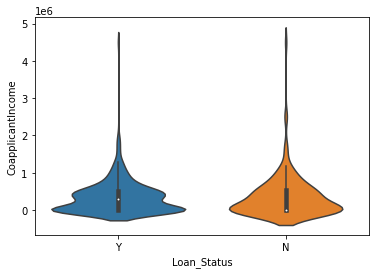

In [241]:
sns.violinplot(x = df['Loan_Status'], y = df['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

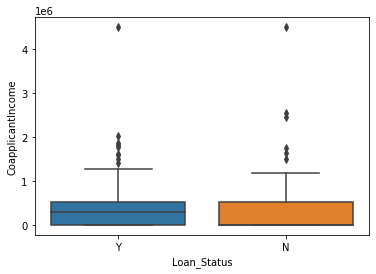

In [242]:
sns.boxplot(x = df['Loan_Status'], y = df['CoapplicantIncome'])

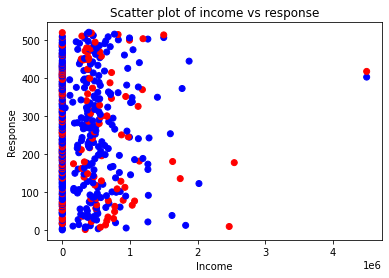

In [243]:
color_dict = {'Y': 'blue', 'N': 'red'}

# Create the scatter plot
plt.scatter(x=df['CoapplicantIncome'], y=range(len(df)), c=df['Loan_Status'].map(color_dict))

# Set the labels and title
plt.xlabel('Income')
plt.ylabel('Response')
plt.title('Scatter plot of income vs response')

# Show the plot
plt.show()


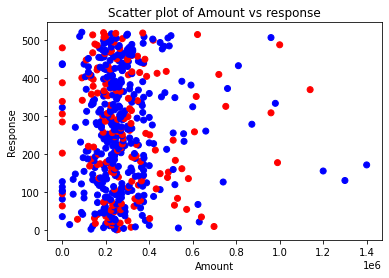

In [244]:
color_dict = {'Y': 'blue', 'N': 'red'}

# Create the scatter plot
plt.scatter(x=df['LoanAmount'], y=range(len(df)), c=df['Loan_Status'].map(color_dict))

# Set the labels and title
plt.xlabel('Amount')
plt.ylabel('Response')
plt.title('Scatter plot of Amount vs response')

# Show the plot
plt.show()


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

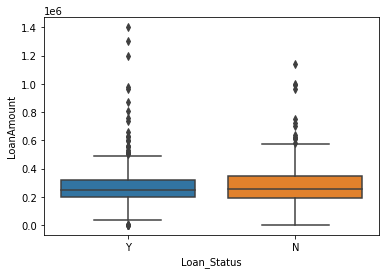

In [245]:
sns.boxplot(x = df['Loan_Status'], y = df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

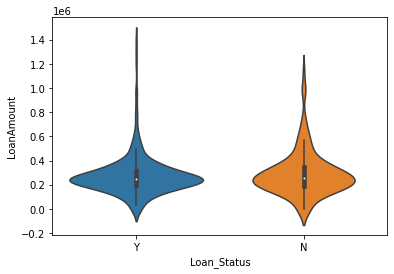

In [246]:
sns.violinplot(x = df['Loan_Status'], y = df['LoanAmount'])

In [247]:
grouped_data = df.groupby('Loan_Status')['LoanAmount'].mean()

# Print the mean income for each group
print("Mean LoanAmount - ", grouped_data)

Mean LoanAmount -  Loan_Status
N    291214.723926
Y    274463.687151
Name: LoanAmount, dtype: float64


In [248]:
grouped_data = df.groupby('Loan_Status')['LoanAmount'].median()

# Print the mean income for each group
print("Median LoanAmount - ", grouped_data)

Median LoanAmount -  Loan_Status
N    254000.0
Y    248000.0
Name: LoanAmount, dtype: float64


In [249]:
grouped_data = df.groupby('Loan_Status')['LoanAmount'].std()

# Print the mean income for each group
print("Standard Deviation LoanAmount Salary - ", grouped_data)

Standard Deviation LoanAmount Salary -  Loan_Status
N    184840.863899
Y    164696.129901
Name: LoanAmount, dtype: float64


In [250]:
df_exp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,1.0,2.0,0.0,1.0,2.0,1316025,0.0,250000,360.0,1.0,1.0,1.0
1,162883,1.0,1.0,1.0,1.0,2.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0
2,620668,1.0,1.0,0.0,1.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0
3,295747,1.0,1.0,0.0,2.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0
4,133390,1.0,2.0,0.0,1.0,2.0,1350000,0.0,282000,360.0,1.0,1.0,1.0


In [251]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             521 non-null    float64
 2   Married            521 non-null    float64
 3   Dependents         521 non-null    float64
 4   Education          521 non-null    float64
 5   Self_Employed      521 non-null    float64
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   521 non-null    float64
 10  Credit_History     521 non-null    float64
 11  Property_Area      521 non-null    float64
 12  Loan_Status        521 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 53.0 KB


In [252]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [253]:
percentiles=[0,0.01,0.02,0.03,0.04,0.05,0.95,0.96,0.97,0.98,0.99,1]

In [254]:
df_exp['LoanAmount'].quantile(percentiles)

0.00          0.0
0.01          0.0
0.02          0.0
0.03          0.0
0.04      60000.0
0.05      88000.0
0.95     572000.0
0.96     617200.0
0.97     675200.0
0.98     790000.0
0.99     988000.0
1.00    1400000.0
Name: LoanAmount, dtype: float64

In [255]:
df_exp[df_exp['LoanAmount'] == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
35,311706,1.0,1.0,0.0,1.0,2.0,511875,465075.0,0,360.0,1.00000,1.0,1.0
63,641557,1.0,1.0,1.0,1.0,2.0,1112625,0.0,0,360.0,0.00000,2.0,2.0
81,596387,1.0,1.0,1.0,1.0,1.0,538875,0.0,0,360.0,1.00000,3.0,1.0
95,782550,1.0,2.0,0.0,1.0,2.0,1525950,0.0,0,360.0,0.84728,1.0,2.0
102,343597,1.0,1.0,0.0,1.0,2.0,3071250,0.0,0,360.0,1.00000,1.0,1.0
103,549111,1.0,1.0,0.0,1.0,2.0,1046700,806175.0,0,360.0,1.00000,3.0,1.0
113,102013,2.0,2.0,1.0,1.0,1.0,1676475,0.0,0,360.0,1.00000,3.0,1.0
127,151352,1.0,2.0,0.0,1.0,2.0,869625,369000.0,0,360.0,1.00000,2.0,1.0
202,592169,1.0,1.0,3.0,2.0,2.0,898200,0.0,0,180.0,1.00000,1.0,2.0
284,553405,1.0,1.0,0.0,1.0,2.0,4650075,0.0,0,360.0,1.00000,2.0,2.0


In [256]:
df_exp = df_exp[df_exp['LoanAmount'] != 0]

In [257]:
percentiles=[0,0.01,0.02,0.03,0.04,0.05,0.95,0.96,0.97,0.98,0.99,1]

In [258]:
result = pd.concat([
    df_exp[col].quantile(percentiles).rename(f'{col}_{p*100:.0f}%')
    for col in df_exp.columns
    for p in percentiles
], axis=1)

In [259]:
df_exp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [260]:
print(result)


      Loan_ID_0%  Loan_ID_1%  Loan_ID_2%  Loan_ID_3%  Loan_ID_4%  Loan_ID_5%  \
0.00   101559.00   101559.00   101559.00   101559.00   101559.00   101559.00   
0.01   110276.59   110276.59   110276.59   110276.59   110276.59   110276.59   
0.02   117174.62   117174.62   117174.62   117174.62   117174.62   117174.62   
0.03   125835.75   125835.75   125835.75   125835.75   125835.75   125835.75   
0.04   133140.96   133140.96   133140.96   133140.96   133140.96   133140.96   
0.05   138915.80   138915.80   138915.80   138915.80   138915.80   138915.80   
0.95   946600.05   946600.05   946600.05   946600.05   946600.05   946600.05   
0.96   954458.36   954458.36   954458.36   954458.36   954458.36   954458.36   
0.97   966320.11   966320.11   966320.11   966320.11   966320.11   966320.11   
0.98   974472.82   974472.82   974472.82   974472.82   974472.82   974472.82   
0.99   983458.00   983458.00   983458.00   983458.00   983458.00   983458.00   
1.00   998791.00   998791.00   998791.00

In [261]:
df_exp['ApplicantIncome'].quantile(percentiles)

0.00       33750.00
0.01      232474.50
0.02      346887.00
0.03      405000.00
0.04      409716.00
0.05      429378.75
0.95     3236591.25
0.96     3371562.00
0.97     3747199.50
0.98     4531464.00
0.99     8460632.25
1.00    18225000.00
Name: ApplicantIncome, dtype: float64

In [262]:
df_exp['CoapplicantIncome'].quantile(percentiles)

0.00          0.00
0.01          0.00
0.02          0.00
0.03          0.00
0.04          0.00
0.05          0.00
0.95    1137048.75
0.96    1256706.00
0.97    1281773.25
0.98    1620778.50
0.99    1873392.75
1.00    4500000.00
Name: CoapplicantIncome, dtype: float64

In [263]:
df_exp['CoapplicantIncome'].quantile([0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.95,0.96,0.97,0.98,0.99,1])

0.00          0.00
0.10          0.00
0.15          0.00
0.20          0.00
0.25          0.00
0.30          0.00
0.35          0.00
0.40          0.00
0.45     167017.50
0.50     282937.50
0.60     389295.00
0.70     472837.50
0.95    1137048.75
0.96    1256706.00
0.97    1281773.25
0.98    1620778.50
0.99    1873392.75
1.00    4500000.00
Name: CoapplicantIncome, dtype: float64

In [264]:
df_exp['Loan_Amount_Term'].quantile(percentiles)

0.00     12.00
0.01     85.08
0.02    180.00
0.03    180.00
0.04    180.00
0.05    180.00
0.95    360.00
0.96    360.00
0.97    360.00
0.98    480.00
0.99    480.00
1.00    480.00
Name: Loan_Amount_Term, dtype: float64

#### Checking outlier via IQR

In [265]:
Q1 = df_exp['LoanAmount'].quantile(0.25)
Q3 = df_exp['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df_exp[(df_exp['LoanAmount'] < lower) | (df_exp['LoanAmount'] > upper)]

print(outliers)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
5     922093     1.0      1.0         2.0        1.0            1.0   
9     696993     1.0      1.0         1.0        1.0            2.0   
21    494912     1.0      1.0         1.0        1.0            2.0   
34    198315     1.0      2.0         3.0        1.0            2.0   
54    392029     2.0      1.0         1.0        1.0            1.0   
65    821307     1.0      1.0         0.0        1.0            2.0   
67    762700     1.0      1.0         1.0        1.0            2.0   
83    619233     1.0      1.0         0.0        1.0            2.0   
119   423065     2.0      2.0         0.0        1.0            2.0   
126   874101     1.0      1.0         3.0        1.0            2.0   
130   702085     1.0      2.0         0.0        1.0            1.0   
135   410417     1.0      1.0         3.0        1.0            2.0   
155   246914     1.0      1.0         3.0        1.0            2.0   
161   

In [266]:
Q1 = df_exp['CoapplicantIncome'].quantile(0.25)
Q3 = df_exp['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df_exp[(df_exp['CoapplicantIncome'] < lower) | (df_exp['CoapplicantIncome'] > upper)]

print(outliers)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
9     696993     1.0      1.0         1.0        1.0            2.0   
12    357855     1.0      1.0         2.0        1.0            2.0   
38    221618     1.0      2.0         0.0        1.0            2.0   
122   190953     2.0      2.0         0.0        1.0            2.0   
135   410417     1.0      1.0         3.0        1.0            2.0   
177   808078     1.0      1.0         3.0        1.0            2.0   
180   878135     1.0      1.0         1.0        1.0            2.0   
253   313230     1.0      1.0         1.0        2.0            2.0   
349   112377     1.0      1.0         0.0        1.0            2.0   
372   135318     1.0      1.0         2.0        1.0            1.0   
402   716546     1.0      2.0         0.0        1.0            2.0   
417   109205     1.0      1.0         2.0        1.0            1.0   
444   898363     1.0      1.0         0.0        1.0            2.0   
506   

In [267]:
Q1 = df_exp['ApplicantIncome'].quantile(0.25)
Q3 = df_exp['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df_exp[(df_exp['ApplicantIncome'] < lower) | (df_exp['ApplicantIncome'] > upper)]

print(outliers)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
9     696993     1.0      1.0         1.0        1.0            2.0   
34    198315     1.0      2.0         3.0        1.0            2.0   
54    392029     2.0      1.0         1.0        1.0            1.0   
67    762700     1.0      1.0         1.0        1.0            2.0   
106   163505     1.0      1.0         2.0        1.0            2.0   
115   271263     1.0      1.0         1.0        1.0            2.0   
119   423065     2.0      2.0         0.0        1.0            2.0   
126   874101     1.0      1.0         3.0        1.0            2.0   
128   527085     1.0      1.0         1.0        1.0            1.0   
130   702085     1.0      2.0         0.0        1.0            1.0   
138   962946     1.0      2.0         0.0        1.0            2.0   
144   852047     1.0      1.0         2.0        1.0            2.0   
146   698189     2.0      1.0         2.0        1.0            2.0   
155   

#### Checking outlier via Z-score

In [268]:
mean = np.mean(df_exp['LoanAmount'])
std = np.std(df_exp['LoanAmount'])
df_exp['LoanAmount_Zscore'] = (df_exp['LoanAmount'] - mean) / std

# identify outliers
z_threshold = 3
outliers = df_exp[abs(df_exp['LoanAmount_Zscore']) > z_threshold]

print(outliers)




     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
130   702085     1.0      2.0         0.0        1.0            1.0   
155   246914     1.0      1.0         3.0        1.0            2.0   
171   646048     1.0      1.0         3.0        1.0            2.0   
177   808078     1.0      1.0         3.0        1.0            2.0   
278   628224     1.0      1.0         0.0        1.0            2.0   
308   239986     1.0      2.0         0.0        1.0            2.0   
333   935427     1.0      1.0         0.0        1.0            2.0   
369   792762     1.0      1.0         0.0        1.0            2.0   
432   664696     1.0      2.0         0.0        1.0            2.0   
487   254974     1.0      1.0         1.0        1.0            2.0   
506   707044     1.0      1.0         0.0        1.0            2.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
130          4537350                0.0     1300000             480.0   
1

In [269]:
mean = np.mean(df_exp['CoapplicantIncome'])
std = np.std(df_exp['CoapplicantIncome'])
df_exp['CoapplicantIncome_Zscore'] = (df_exp['CoapplicantIncome'] - mean) / std

# identify outliers
z_threshold = 3
outliers = df_exp[abs(df_exp['CoapplicantIncome_Zscore']) > z_threshold]

print(outliers)



     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
9     696993     1.0      1.0         1.0        1.0            2.0   
12    357855     1.0      1.0         2.0        1.0            2.0   
122   190953     2.0      2.0         0.0        1.0            2.0   
177   808078     1.0      1.0         3.0        1.0            2.0   
402   716546     1.0      2.0         0.0        1.0            2.0   
417   109205     1.0      1.0         2.0        1.0            1.0   
444   898363     1.0      1.0         0.0        1.0            2.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
9            2889225          2467800.0      698000             360.0   
12            691425          1823850.0      400000             360.0   
122           480825          2020500.0      274000             360.0   
177          1241100          2542500.0      990000             360.0   
402           562500          4500000.0      206000             36

In [270]:
mean = np.mean(df_exp['ApplicantIncome'])
std = np.std(df_exp['ApplicantIncome'])
df_exp['ApplicantIncome_Zscore'] = (df_exp['ApplicantIncome'] - mean) / std

# identify outliers
z_threshold = 3
outliers = df_exp[abs(df_exp['ApplicantIncome_Zscore']) > z_threshold]

print(outliers)



     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
155   246914     1.0      1.0         3.0        1.0            2.0   
171   646048     1.0      1.0         3.0        1.0            2.0   
183   936171     1.0      1.0         1.0        1.0            2.0   
185   881568     1.0      1.0         0.0        1.0            1.0   
333   935427     1.0      1.0         0.0        1.0            2.0   
409   869489     1.0      1.0         3.0        1.0            2.0   
443   297840     1.0      2.0         1.0        1.0            2.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
155          8999775                0.0     1200000             180.0   
171         11646675                0.0     1400000             300.0   
183          7615350                0.0      520000             360.0   
185          8808075          1068750.0      240000             360.0   
333         14250825                0.0      980000             18

In [271]:
df_exp.drop(['Gender','Loan_ID','Self_Employed'],axis=1)

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439
517,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573
518,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410
519,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293


In [272]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 520
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   504 non-null    int64  
 1   Gender                    504 non-null    float64
 2   Married                   504 non-null    float64
 3   Dependents                504 non-null    float64
 4   Education                 504 non-null    float64
 5   Self_Employed             504 non-null    float64
 6   ApplicantIncome           504 non-null    int64  
 7   CoapplicantIncome         504 non-null    float64
 8   LoanAmount                504 non-null    int64  
 9   Loan_Amount_Term          504 non-null    float64
 10  Credit_History            504 non-null    float64
 11  Property_Area             504 non-null    float64
 12  Loan_Status               504 non-null    float64
 13  LoanAmount_Zscore         504 non-null    float64
 14  Coapplican

In [273]:
# create a sample dataframe
df1 = pd.DataFrame({
    'Age': [20, 30, 40, 50, 60, 70],
    'Income': [20000, 35000, 45000, 55000, 65000, 75000]
})

# create 3 bins of equal width for the Age column
df1['Age_Bins_Equal_Width'] = pd.cut(df1['Age'], bins=6)

# create 3 bins of equal frequency for the Income column
df1['Income_Bins_Equal_Freq'] = pd.qcut(df1['Income'], q=6)

# print the resulting dataframe
print(df1)

   Age  Income Age_Bins_Equal_Width  Income_Bins_Equal_Freq
0   20   20000      (19.95, 28.333]    (19999.999, 32500.0]
1   30   35000     (28.333, 36.667]    (32500.0, 41666.667]
2   40   45000       (36.667, 45.0]    (41666.667, 50000.0]
3   50   55000       (45.0, 53.333]    (50000.0, 58333.333]
4   60   65000     (53.333, 61.667]  (58333.333, 66666.667]
5   70   75000       (61.667, 70.0]    (66666.667, 75000.0]


In [274]:
df_exp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_Zscore', 'CoapplicantIncome_Zscore',
       'ApplicantIncome_Zscore'],
      dtype='object')

In [275]:
df_exp.drop(['Loan_ID','Gender', 'Self_Employed'],axis=1,inplace=True)

In [276]:
df_exp

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439
517,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573
518,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410
519,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293


In [277]:
df_exp['LoanAmount_bin'] = pd.cut(df_exp['LoanAmount'], bins=5)
df_exp['Applicantincome_bin'] = pd.cut(df_exp['ApplicantIncome'], bins=5)
df_exp['Copplicantincome_bin'] = pd.cut(df_exp['CoapplicantIncome'], bins=5)
# print the resulting dataframe
print(df_exp)

     Married  Dependents  Education  ApplicantIncome  CoapplicantIncome  \
0        2.0         0.0        1.0          1316025                0.0   
1        1.0         1.0        1.0          1031175           339300.0   
2        1.0         0.0        1.0           675000                0.0   
3        1.0         0.0        2.0           581175           530550.0   
4        2.0         0.0        1.0          1350000                0.0   
..       ...         ...        ...              ...                ...   
516      1.0         2.0        1.0           456975           367200.0   
517      1.0         0.0        2.0           691650           405000.0   
518      2.0         0.0        1.0          1053675           430875.0   
519      2.0         0.0        2.0           765000                0.0   
520      1.0         2.0        2.0           493200           391950.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  \
0        250000   

In [278]:
df_exp

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
517,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
518,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
519,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"


In [279]:
df_exp['LoanAmount_bin'].unique()

[(32634.0, 307200.0], (307200.0, 580400.0], (580400.0, 853600.0], (1126800.0, 1400000.0], (853600.0, 1126800.0]]
Categories (5, interval[float64, right]): [(32634.0, 307200.0] < (307200.0, 580400.0] < (580400.0, 853600.0] < (853600.0, 1126800.0] < (1126800.0, 1400000.0]]

In [280]:
df_exp['Copplicantincome_bin'].unique()

[(-4500.0, 900000.0], (900000.0, 1800000.0], (1800000.0, 2700000.0], (3600000.0, 4500000.0]]
Categories (5, interval[float64, right]): [(-4500.0, 900000.0] < (900000.0, 1800000.0] < (1800000.0, 2700000.0] < (2700000.0, 3600000.0] < (3600000.0, 4500000.0]]

In [281]:
df_exp['Applicantincome_bin'].unique()

[(15558.75, 3672000.0], (3672000.0, 7310250.0], (7310250.0, 10948500.0], (10948500.0, 14586750.0], (14586750.0, 18225000.0]]
Categories (5, interval[float64, right]): [(15558.75, 3672000.0] < (3672000.0, 7310250.0] < (7310250.0, 10948500.0] < (10948500.0, 14586750.0] < (14586750.0, 18225000.0]]

In [282]:
# Define the cut points and labels for LoanAmount
cut_points_la = [32634.0, 307200.0, 580400.0, 853600.0, 1126800.0, 1400000.0]
labels_la = [1, 2, 3, 4, 5]

# Define the cut points and labels for Applicantincome
cut_points_ai = [15558.75, 3672000.0, 7310250.0, 10948500.0, 14586750.0, 18225000.0]
labels_ai = [1, 2, 3, 4, 5]

# Define the cut points and labels for Coapplicantincome
cut_points_ci = [-4500.0, 900000.0, 1800000.0, 2700000.0, 3600000.0, 4500000.0]
labels_ci = [1, 2, 3, 4, 5]

In [283]:
df_exp = df_exp.reset_index(drop=True)


In [284]:
df_exp2 = df_exp.copy()

In [285]:
df_exp2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"


In [286]:
def binning(col, cut_points, labels=None):
    # Create the bins
    bins = pd.cut(col, cut_points, labels=labels)
    # Return the binned column
    return bins

In [287]:
# Apply binning to ApplicantIncome
df_exp2["ApplicantIncomeBin"] = binning(df_exp2["ApplicantIncome"], cut_points_ai, labels_ai)

# Apply binning to CoapplicantIncome
df_exp2["CoapplicantIncomeBin"] = binning(df_exp2["CoapplicantIncome"], cut_points_ci, labels_ci)

# Apply binning to LoanAmount
df_exp2["LoanAmountBin"] = binning(df_exp2["LoanAmount"], cut_points_la, labels_la)

In [288]:
# df_exp2.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount",'LoanAmount_bin','Applicantincome_bin','Copplicantincome_bin'], axis=1,inplace=True)

In [289]:
df_exp2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1


In [290]:
df_exp2['ApplicantIncomeBin'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

### PCA (Principal Components Analysis) for dimension reduction

In [291]:
columns_for_pca = ['ApplicantIncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin']
df_pca = df_exp2[columns_for_pca]
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca_scaled)
df_principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [292]:
df_principal_components

,PC1,PC2
0,-0.600780,-0.154287
1,-0.600780,-0.154287
2,-0.600780,-0.154287
3,-0.600780,-0.154287
4,-0.600780,-0.154287
...,...,...
499,-0.600780,-0.154287
500,-0.600780,-0.154287
501,0.435002,-0.167130
502,-0.600780,-0.154287


In [293]:
df_principal_components['PC1']

0     -0.600780
1     -0.600780
2     -0.600780
3     -0.600780
4     -0.600780
         ...   
499   -0.600780
500   -0.600780
501    0.435002
502   -0.600780
503   -0.600780
Name: PC1, Length: 504, dtype: float64

In [294]:
df_exp2 = df_exp2.reset_index(drop=True)
df_exp2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1


In [295]:
df_exp2_with_pca = pd.concat([df_exp2, df_principal_components[['PC1', 'PC2']]], axis=1)

In [296]:
df_exp2_with_pca

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,...,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,...,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,...,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,...,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,...,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,...,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,...,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,...,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2,0.435002,-0.167130
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,...,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287


In [297]:
df_exp2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1


In [126]:
# df_exp3 = df_exp2_with_pca.drop(['ApplicantIncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin'],axis=1)

In [298]:
df_exp3 = df_exp2_with_pca.copy()

In [299]:
df_exp3

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,...,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,...,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,...,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,...,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,...,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,...,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,...,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,...,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2,0.435002,-0.167130
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,...,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287


In [300]:
df_exp2_with_pca

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,...,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,...,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,...,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,...,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,...,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,...,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,...,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,...,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2,0.435002,-0.167130
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,...,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287


In [301]:
df_exp2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1


In [302]:
print(df_exp2.index.duplicated().sum())
print(df_principal_components.index.duplicated().sum())

0
0


In [303]:
print(df_exp2.isnull().sum())
print(df_principal_components.isnull().sum())


Married                     0
Dependents                  0
Education                   0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
LoanAmount_Zscore           0
CoapplicantIncome_Zscore    0
ApplicantIncome_Zscore      0
LoanAmount_bin              0
Applicantincome_bin         0
Copplicantincome_bin        0
ApplicantIncomeBin          0
CoapplicantIncomeBin        0
LoanAmountBin               0
dtype: int64
PC1    0
PC2    0
dtype: int64


In [304]:
df_exp3_features = df_exp3.drop('Loan_Status', axis=1)

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_exp3_features.columns
vif["VIF"] = [variance_inflation_factor(df_exp3_features.values, i) for i in range(df_exp3_features.shape[1])]

# print the results
print(vif)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [305]:
df_exp

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]"


In [306]:
df_exp3['Loan_Amount_per_month'] = df_exp['LoanAmount']/df_exp3['Loan_Amount_Term']

In [307]:
# df_exp3['Loan_Amount_per_month'].unique()
df_exp3[df_exp3['Loan_Amount_per_month'].isna()]


,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month


In [308]:
df_exp3['Loan_Amount_Term'].unique()

array([360.        , 120.        , 240.        , 343.26627219,
       180.        ,  60.        , 300.        , 480.        ,
        36.        ,  84.        ,  12.        ])

In [309]:
df_exp['LoanAmount'].unique()

array([ 250000,  256000,  132000,  240000,  282000,  534000,  190000,
        316000,  336000,  698000,  140000,  218000,  400000,  228000,
         34000,  200000,  152000,  266000,  230000,  208000,  630000,
        232000,  224000,  302000,  382000,  244000,  220000,   70000,
        402000,  148000,  212000,  640000,  288000,  368000,  160000,
         94000,  150000,  268000,  192000,  176000,   88000,  572000,
        194000,  270000,  360000,  198000,  330000,  516000,  252000,
        624000,  272000,  344000,  162000,  374000,  226000,  352000,
        260000,  222000,  334000,  530000,  100000,  420000,  350000,
        262000,  376000,   50000,  274000,  320000,  450000,  432000,
        188000,  278000,  304000,  236000,  370000,  308000,  170000,
        518000,  388000,  186000,  740000,  364000, 1300000,  204000,
        580000,  168000,  484000,  258000,   60000,  488000, 1200000,
        510000,  196000,  550000,  242000,  126000, 1400000,  174000,
        202000,  990

In [310]:
df_exp3

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,...,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,694.444444
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,...,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,711.111111
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,...,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,366.666667
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,...,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,666.666667
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,...,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,783.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,...,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,470.833333
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,...,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,683.333333
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,...,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2,0.435002,-0.167130,1027.777778
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,...,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,527.777778


In [311]:
df_exp4 = df_exp3.copy()

In [312]:
# df_exp4.drop('Loan_Amount_Term',axis=1,inplace=True)

In [313]:
df_exp4

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,...,0.060426,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,694.444444
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,...,-0.134834,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,711.111111
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,...,-0.378986,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,366.666667
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,...,-0.443302,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,666.666667
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,...,0.083716,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,783.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,...,-0.528439,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,470.833333
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,...,-0.367573,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,683.333333
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,...,-0.119410,"(307200.0, 580400.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,2,0.435002,-0.167130,1027.777778
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,...,-0.317293,"(32634.0, 307200.0]","(15558.75, 3672000.0]","(-4500.0, 900000.0]",1,1,1,-0.600780,-0.154287,527.777778


In [314]:
df_exp4_features = df_exp4

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_exp4_features.columns
vif["VIF"] = [variance_inflation_factor(df_exp4.values, i) for i in range(df_exp4.shape[1])]

# print the results
print(vif)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [316]:
df_exp.isnull().sum()

Married                     0
Dependents                  0
Education                   0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
LoanAmount_Zscore           0
CoapplicantIncome_Zscore    0
ApplicantIncome_Zscore      0
LoanAmount_bin              0
Applicantincome_bin         0
Copplicantincome_bin        0
dtype: int64

In [326]:
df_exp4.drop(['Copplicantincome_bin','Applicantincome_bin','LoanAmount_bin'],axis=1,inplace=True)

In [327]:
df_exp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Married                   504 non-null    float64 
 1   Dependents                504 non-null    float64 
 2   Education                 504 non-null    float64 
 3   ApplicantIncome           504 non-null    int64   
 4   CoapplicantIncome         504 non-null    float64 
 5   LoanAmount                504 non-null    int64   
 6   Loan_Amount_Term          504 non-null    float64 
 7   Credit_History            504 non-null    float64 
 8   Property_Area             504 non-null    float64 
 9   Loan_Status               504 non-null    float64 
 10  LoanAmount_Zscore         504 non-null    float64 
 11  CoapplicantIncome_Zscore  504 non-null    float64 
 12  ApplicantIncome_Zscore    504 non-null    float64 
 13  ApplicantIncomeBin        504 non-null    category

In [328]:
# df_exp4['LoanAmountBin','CoapplicantIncomeBin','ApplicantIncomeBin','Copplicantincome_bin','Applicantincome_bin'] = df_exp4['LoanAmountBin','CoapplicantIncomeBin','ApplicantIncomeBin','Copplicantincome_bin','Applicantincome_bin'].astype('float64')
df_exp4[['LoanAmountBin','CoapplicantIncomeBin','ApplicantIncomeBin']] = df_exp4[['LoanAmountBin','CoapplicantIncomeBin','ApplicantIncomeBin']].astype('float64')


In [329]:
df_exp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Married                   504 non-null    float64
 1   Dependents                504 non-null    float64
 2   Education                 504 non-null    float64
 3   ApplicantIncome           504 non-null    int64  
 4   CoapplicantIncome         504 non-null    float64
 5   LoanAmount                504 non-null    int64  
 6   Loan_Amount_Term          504 non-null    float64
 7   Credit_History            504 non-null    float64
 8   Property_Area             504 non-null    float64
 9   Loan_Status               504 non-null    float64
 10  LoanAmount_Zscore         504 non-null    float64
 11  CoapplicantIncome_Zscore  504 non-null    float64
 12  ApplicantIncome_Zscore    504 non-null    float64
 13  ApplicantIncomeBin        504 non-null    float64
 14  Coapplican

In [315]:
print(df_exp4.isnull().sum())
print(df_principal_components.isnull().sum())


Married                     0
Dependents                  0
Education                   0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
LoanAmount_Zscore           0
CoapplicantIncome_Zscore    0
ApplicantIncome_Zscore      0
LoanAmount_bin              0
Applicantincome_bin         0
Copplicantincome_bin        0
ApplicantIncomeBin          0
CoapplicantIncomeBin        0
LoanAmountBin               0
PC1                         0
PC2                         0
Loan_Amount_per_month       0
dtype: int64
PC1    0
PC2    0
dtype: int64


In [330]:
df_exp4_features = df_exp4

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_exp4_features.columns
vif["VIF"] = [variance_inflation_factor(df_exp4.values, i) for i in range(df_exp4.shape[1])]

# print the results
print(vif)

                     Feature       VIF
0                    Married  1.265021
1                 Dependents  1.185333
2                  Education  1.110323
3            ApplicantIncome       inf
4          CoapplicantIncome       inf
5                 LoanAmount       inf
6           Loan_Amount_Term  1.597887
7             Credit_History  1.407838
8              Property_Area  1.035739
9                Loan_Status  1.447299
10         LoanAmount_Zscore       inf
11  CoapplicantIncome_Zscore       inf
12    ApplicantIncome_Zscore       inf
13        ApplicantIncomeBin       inf
14      CoapplicantIncomeBin       inf
15             LoanAmountBin       inf
16                       PC1       inf
17                       PC2       inf
18     Loan_Amount_per_month  1.934576


C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [331]:
df_exp4

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,1.0,1.0,1.0,-0.600780,-0.154287,694.444444
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,1.0,1.0,1.0,-0.600780,-0.154287,711.111111
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,1.0,1.0,1.0,-0.600780,-0.154287,366.666667
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,1.0,1.0,1.0,-0.600780,-0.154287,666.666667
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,1.0,1.0,1.0,-0.600780,-0.154287,783.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,1.0,1.0,1.0,-0.600780,-0.154287,470.833333
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,1.0,1.0,1.0,-0.600780,-0.154287,683.333333
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,1.0,1.0,2.0,0.435002,-0.167130,1027.777778
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,1.0,1.0,1.0,-0.600780,-0.154287,527.777778


In [332]:
df_exp4['ApplicantIncomeBin'].unique()

array([1., 2., 3., 4., 5.])

In [333]:
print(df_exp3.isnull().sum())


Married                     0
Dependents                  0
Education                   0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
LoanAmount_Zscore           0
CoapplicantIncome_Zscore    0
ApplicantIncome_Zscore      0
LoanAmount_bin              0
Applicantincome_bin         0
Copplicantincome_bin        0
ApplicantIncomeBin          0
CoapplicantIncomeBin        0
LoanAmountBin               0
PC1                         0
PC2                         0
Loan_Amount_per_month       0
dtype: int64


In [334]:
df_exp4

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,1.0,1.0,1.0,-0.600780,-0.154287,694.444444
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,1.0,1.0,1.0,-0.600780,-0.154287,711.111111
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,1.0,1.0,1.0,-0.600780,-0.154287,366.666667
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,1.0,1.0,1.0,-0.600780,-0.154287,666.666667
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,1.0,1.0,1.0,-0.600780,-0.154287,783.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,1.0,1.0,1.0,-0.600780,-0.154287,470.833333
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,1.0,1.0,1.0,-0.600780,-0.154287,683.333333
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,1.0,1.0,2.0,0.435002,-0.167130,1027.777778
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,1.0,1.0,1.0,-0.600780,-0.154287,527.777778


In [335]:
scaler = MinMaxScaler()
df_exp4_normalized = scaler.fit_transform(df_exp4)

In [336]:
df_exp4_normalized

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.28786566e-01, 2.87878788e-02],
       [0.00000000e+00, 3.33333333e-01, 0.00000000e+00, ...,
        1.49880108e-15, 4.28786566e-01, 2.96969697e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.47104551e-15, 4.28786566e-01, 1.09090909e-02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.09628604e-01, 4.27893429e-01, 4.69696970e-02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.47104551e-15, 4.28786566e-01, 1.96969697e-02],
       [0.00000000e+00, 6.66666667e-01, 1.00000000e+00, ...,
        1.47104551e-15, 4.28786566e-01, 4.54545455e-03]])

In [337]:
df_exp4

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,1316025,0.0,250000,360.0,1.0,1.0,1.0,-0.235888,-0.728877,0.060426,1.0,1.0,1.0,-0.600780,-0.154287,694.444444
1,1.0,1.0,1.0,1031175,339300.0,256000,360.0,1.0,2.0,2.0,-0.199727,-0.031860,-0.134834,1.0,1.0,1.0,-0.600780,-0.154287,711.111111
2,1.0,0.0,1.0,675000,0.0,132000,360.0,1.0,1.0,1.0,-0.947069,-0.728877,-0.378986,1.0,1.0,1.0,-0.600780,-0.154287,366.666667
3,1.0,0.0,2.0,581175,530550.0,240000,360.0,1.0,1.0,1.0,-0.296158,0.361020,-0.443302,1.0,1.0,1.0,-0.600780,-0.154287,666.666667
4,2.0,0.0,1.0,1350000,0.0,282000,360.0,1.0,1.0,1.0,-0.043026,-0.728877,0.083716,1.0,1.0,1.0,-0.600780,-0.154287,783.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.0,2.0,1.0,456975,367200.0,226000,480.0,1.0,3.0,1.0,-0.380535,0.025454,-0.528439,1.0,1.0,1.0,-0.600780,-0.154287,470.833333
500,1.0,0.0,2.0,691650,405000.0,246000,360.0,0.0,3.0,2.0,-0.259996,0.103106,-0.367573,1.0,1.0,1.0,-0.600780,-0.154287,683.333333
501,2.0,0.0,1.0,1053675,430875.0,370000,360.0,1.0,3.0,2.0,0.487346,0.156260,-0.119410,1.0,1.0,2.0,0.435002,-0.167130,1027.777778
502,2.0,0.0,2.0,765000,0.0,190000,360.0,1.0,2.0,2.0,-0.597506,-0.728877,-0.317293,1.0,1.0,1.0,-0.600780,-0.154287,527.777778


In [338]:
scaler = MinMaxScaler()
df_exp4_normalized = scaler.fit_transform(df_exp4)
df_exp4_normalized = pd.DataFrame(df_exp4_normalized, columns=df_exp4.columns)

In [339]:
df_exp4_normalized

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,1.0,0.000000,0.0,0.070489,0.00000,0.158126,0.74359,1.0,0.0,0.0,0.158126,0.00000,0.070489,0.0,0.0,0.00,0.000000e+00,0.428787,0.028788
1,0.0,0.333333,0.0,0.054830,0.07540,0.162518,0.74359,1.0,0.5,1.0,0.162518,0.07540,0.054830,0.0,0.0,0.00,1.498801e-15,0.428787,0.029697
2,0.0,0.000000,0.0,0.035250,0.00000,0.071742,0.74359,1.0,0.0,0.0,0.071742,0.00000,0.035250,0.0,0.0,0.00,1.471046e-15,0.428787,0.010909
3,0.0,0.000000,1.0,0.030093,0.11790,0.150805,0.74359,1.0,0.0,0.0,0.150805,0.11790,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.027273
4,1.0,0.000000,0.0,0.072356,0.00000,0.181552,0.74359,1.0,0.0,0.0,0.181552,0.00000,0.072356,0.0,0.0,0.00,1.471046e-15,0.428787,0.033636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.0,0.666667,0.0,0.023265,0.08160,0.140556,1.00000,1.0,1.0,0.0,0.140556,0.08160,0.023265,0.0,0.0,0.00,1.471046e-15,0.428787,0.016591
500,0.0,0.000000,1.0,0.036166,0.09000,0.155198,0.74359,0.0,1.0,1.0,0.155198,0.09000,0.036166,0.0,0.0,0.00,1.471046e-15,0.428787,0.028182
501,1.0,0.000000,0.0,0.056067,0.09575,0.245974,0.74359,1.0,1.0,1.0,0.245974,0.09575,0.056067,0.0,0.0,0.25,1.096286e-01,0.427893,0.046970
502,1.0,0.000000,1.0,0.040198,0.00000,0.114202,0.74359,1.0,0.5,1.0,0.114202,0.00000,0.040198,0.0,0.0,0.00,1.471046e-15,0.428787,0.019697


In [340]:
df_exp4_features = df_exp4_normalized

# calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_exp4_features.columns
vif["VIF"] = [variance_inflation_factor(df_exp4_normalized.values, i) for i in range(df_exp4_normalized.shape[1])]

# print the results
print(vif)

                     Feature        VIF
0                    Married   1.265021
1                 Dependents   1.185333
2                  Education   1.110323
3            ApplicantIncome        inf
4          CoapplicantIncome        inf
5                 LoanAmount        inf
6           Loan_Amount_Term   1.597887
7             Credit_History   1.407838
8              Property_Area   1.035739
9                Loan_Status   1.447299
10         LoanAmount_Zscore        inf
11  CoapplicantIncome_Zscore        inf
12    ApplicantIncome_Zscore        inf
13        ApplicantIncomeBin        inf
14      CoapplicantIncomeBin        inf
15             LoanAmountBin        inf
16                       PC1        inf
17                       PC2  71.432221
18     Loan_Amount_per_month   1.934576


C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [341]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.68714
N    0.31286
Name: Loan_Status, dtype: float64

In [342]:
df_exp4_normalized

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,1.0,0.000000,0.0,0.070489,0.00000,0.158126,0.74359,1.0,0.0,0.0,0.158126,0.00000,0.070489,0.0,0.0,0.00,0.000000e+00,0.428787,0.028788
1,0.0,0.333333,0.0,0.054830,0.07540,0.162518,0.74359,1.0,0.5,1.0,0.162518,0.07540,0.054830,0.0,0.0,0.00,1.498801e-15,0.428787,0.029697
2,0.0,0.000000,0.0,0.035250,0.00000,0.071742,0.74359,1.0,0.0,0.0,0.071742,0.00000,0.035250,0.0,0.0,0.00,1.471046e-15,0.428787,0.010909
3,0.0,0.000000,1.0,0.030093,0.11790,0.150805,0.74359,1.0,0.0,0.0,0.150805,0.11790,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.027273
4,1.0,0.000000,0.0,0.072356,0.00000,0.181552,0.74359,1.0,0.0,0.0,0.181552,0.00000,0.072356,0.0,0.0,0.00,1.471046e-15,0.428787,0.033636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.0,0.666667,0.0,0.023265,0.08160,0.140556,1.00000,1.0,1.0,0.0,0.140556,0.08160,0.023265,0.0,0.0,0.00,1.471046e-15,0.428787,0.016591
500,0.0,0.000000,1.0,0.036166,0.09000,0.155198,0.74359,0.0,1.0,1.0,0.155198,0.09000,0.036166,0.0,0.0,0.00,1.471046e-15,0.428787,0.028182
501,1.0,0.000000,0.0,0.056067,0.09575,0.245974,0.74359,1.0,1.0,1.0,0.245974,0.09575,0.056067,0.0,0.0,0.25,1.096286e-01,0.427893,0.046970
502,1.0,0.000000,1.0,0.040198,0.00000,0.114202,0.74359,1.0,0.5,1.0,0.114202,0.00000,0.040198,0.0,0.0,0.00,1.471046e-15,0.428787,0.019697


In [343]:
df_exp4_normalized['ApplicantIncomeBin'].unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [344]:
x = df_exp4_normalized.copy()

In [345]:
x.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,1.0,0.000000,0.0,0.070489,0.0000,0.158126,0.74359,1.0,0.0,0.0,0.158126,0.0000,0.070489,0.0,0.0,0.0,0.000000e+00,0.428787,0.028788
1,0.0,0.333333,0.0,0.054830,0.0754,0.162518,0.74359,1.0,0.5,1.0,0.162518,0.0754,0.054830,0.0,0.0,0.0,1.498801e-15,0.428787,0.029697
2,0.0,0.000000,0.0,0.035250,0.0000,0.071742,0.74359,1.0,0.0,0.0,0.071742,0.0000,0.035250,0.0,0.0,0.0,1.471046e-15,0.428787,0.010909
3,0.0,0.000000,1.0,0.030093,0.1179,0.150805,0.74359,1.0,0.0,0.0,0.150805,0.1179,0.030093,0.0,0.0,0.0,1.471046e-15,0.428787,0.027273
4,1.0,0.000000,0.0,0.072356,0.0000,0.181552,0.74359,1.0,0.0,0.0,0.181552,0.0000,0.072356,0.0,0.0,0.0,1.471046e-15,0.428787,0.033636


In [346]:
x=x.drop('Loan_Status',axis=1)

In [347]:
x.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,1.0,0.000000,0.0,0.070489,0.0000,0.158126,0.74359,1.0,0.0,0.158126,0.0000,0.070489,0.0,0.0,0.0,0.000000e+00,0.428787,0.028788
1,0.0,0.333333,0.0,0.054830,0.0754,0.162518,0.74359,1.0,0.5,0.162518,0.0754,0.054830,0.0,0.0,0.0,1.498801e-15,0.428787,0.029697
2,0.0,0.000000,0.0,0.035250,0.0000,0.071742,0.74359,1.0,0.0,0.071742,0.0000,0.035250,0.0,0.0,0.0,1.471046e-15,0.428787,0.010909
3,0.0,0.000000,1.0,0.030093,0.1179,0.150805,0.74359,1.0,0.0,0.150805,0.1179,0.030093,0.0,0.0,0.0,1.471046e-15,0.428787,0.027273
4,1.0,0.000000,0.0,0.072356,0.0000,0.181552,0.74359,1.0,0.0,0.181552,0.0000,0.072356,0.0,0.0,0.0,1.471046e-15,0.428787,0.033636


In [348]:
y=df_exp4_normalized['Loan_Status']

In [349]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Loan_Status, dtype: float64

In [350]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

Following models can be performed
Logistic Regression,
Decision Trees,
Random Forest,
Support Vector Machines (SVM),
Naive Bayes,
Gradient Boosting

Logistic Regression

In [351]:
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7857142857142857
Precision: 0.85
Recall: 0.4146341463414634
F1 score: 0.5573770491803278


Decision Tree model

In [352]:
# Create a Decision Tree object with default hyperparameters
dtree = DecisionTreeClassifier()

# Train the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred = dtree.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6984126984126984
Precision: 0.5405405405405406
Recall: 0.4878048780487805
F1 score: 0.5128205128205128


Random Forest model

In [353]:
# Create a Random Forest object with default hyperparameters
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.753968253968254
Precision: 0.7083333333333334
Recall: 0.4146341463414634
F1 score: 0.523076923076923


Support Vector Machines (SVM) Model

In [354]:
# Create an SVM object with default hyperparameters
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7936507936507936
Precision: 0.8947368421052632
Recall: 0.4146341463414634
F1 score: 0.5666666666666667


Naive Bayes Model

In [355]:
# Create a Naive Bayes object
nb = GaussianNB()

# Train the model on the training data
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7857142857142857
Precision: 0.7916666666666666
Recall: 0.4634146341463415
F1 score: 0.5846153846153846


Gradient Boosting Model

In [356]:
# Create a Gradient Boosting object
gb = GradientBoostingClassifier()

# Train the model on the training data
gb.fit(X_train, y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.7380952380952381
Precision: 0.6666666666666666
Recall: 0.3902439024390244
F1 score: 0.4923076923076923


GB got 73.8%, NB got 78.6%, SVC got 79.3%, RF got 75.4%, DT got 69.8%, LR got 78.6%. So top 3 models are SVC, NB and LR.

In [406]:
new_data = pd.read_excel('consumer creditworthiness test data.xlsx')
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...
88,745846,Female,No,0,Graduate,No,652500,0,142000,360,1.0,Rural
89,632570,Male,Yes,3+,Graduate,No,923850,0,80000,180,1.0,Rural
90,320705,Male,Yes,1,Graduate,No,1816200,54000,506000,360,1.0,Urban
91,333950,Male,Yes,2,Graduate,No,1706175,0,374000,360,1.0,Urban


In [407]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            93 non-null     int64  
 1   Gender             90 non-null     object 
 2   Married            93 non-null     object 
 3   Dependents         91 non-null     object 
 4   Education          93 non-null     object 
 5   Self_Employed      88 non-null     object 
 6   ApplicantIncome    93 non-null     int64  
 7   CoapplicantIncome  93 non-null     int64  
 8   LoanAmount         93 non-null     int64  
 9   Loan_Amount_Term   93 non-null     int64  
 10  Credit_History     86 non-null     float64
 11  Property_Area      93 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 8.8+ KB


In [408]:
new_data.fillna(new_data.mean(),inplace=True)

C:\Users\Rachit Pahwa\AppData\Local\Temp\ipykernel_27876\1739412563.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.fillna(new_data.mean(),inplace=True)


In [409]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            93 non-null     int64  
 1   Gender             90 non-null     object 
 2   Married            93 non-null     object 
 3   Dependents         91 non-null     object 
 4   Education          93 non-null     object 
 5   Self_Employed      88 non-null     object 
 6   ApplicantIncome    93 non-null     int64  
 7   CoapplicantIncome  93 non-null     int64  
 8   LoanAmount         93 non-null     int64  
 9   Loan_Amount_Term   93 non-null     int64  
 10  Credit_History     93 non-null     float64
 11  Property_Area      93 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 8.8+ KB


In [410]:
new_data = new_data.apply(lambda x: x.fillna(x.mode()[0]))

In [411]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            93 non-null     int64  
 1   Gender             93 non-null     object 
 2   Married            93 non-null     object 
 3   Dependents         93 non-null     object 
 4   Education          93 non-null     object 
 5   Self_Employed      93 non-null     object 
 6   ApplicantIncome    93 non-null     int64  
 7   CoapplicantIncome  93 non-null     int64  
 8   LoanAmount         93 non-null     int64  
 9   Loan_Amount_Term   93 non-null     int64  
 10  Credit_History     93 non-null     float64
 11  Property_Area      93 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 8.8+ KB


In [412]:
map_dict = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Y': 1, 'N': 2, 'Urban': 1, 'Rural': 2, 'Semiurban': 3, 0: 0, 1: 1, 2: 2, '3+': 3,'Graduate': 1, 'Not Graduate': 2}
new_data['Gender'] = new_data['Gender'].map(map_dict).astype(float)
new_data['Education'] = new_data['Education'].map(map_dict).astype(float)
new_data['Self_Employed'] = new_data['Self_Employed'].map(map_dict).astype(float)
new_data['Property_Area'] = new_data['Property_Area'].map(map_dict).astype(float)
new_data['Dependents'] = new_data['Dependents'].map(map_dict).astype(float)
new_data['Married'] = new_data['Married'].map(map_dict).astype(float)

In [413]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            93 non-null     int64  
 1   Gender             93 non-null     float64
 2   Married            93 non-null     float64
 3   Dependents         93 non-null     float64
 4   Education          93 non-null     float64
 5   Self_Employed      93 non-null     float64
 6   ApplicantIncome    93 non-null     int64  
 7   CoapplicantIncome  93 non-null     int64  
 8   LoanAmount         93 non-null     int64  
 9   Loan_Amount_Term   93 non-null     int64  
 10  Credit_History     93 non-null     float64
 11  Property_Area      93 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 8.8 KB


In [414]:
Q1 = new_data['LoanAmount'].quantile(0.25)
Q3 = new_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = new_data[(new_data['LoanAmount'] < lower) | (new_data['LoanAmount'] > upper)]

print(outliers)

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
2    425437     1.0      1.0         2.0        1.0            1.0   
4    180559     1.0      1.0         2.0        1.0            1.0   
15   209260     1.0      1.0         0.0        1.0            2.0   
40   739788     2.0      1.0         1.0        1.0            1.0   
79   153131     2.0      2.0         3.0        1.0            2.0   
83   862622     2.0      1.0         1.0        1.0            2.0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
2           1788300            1612350      960000               360   
4           3937500                  0      800000               360   
15          1379925             878850      648000               360   
40          4383900                  0     1200000               360   
79            93600            9375075      700000               180   
83          2700000                  0      992000               360   

    

In [415]:
Q1 = new_data['CoapplicantIncome'].quantile(0.25)
Q3 = new_data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = new_data[(new_data['CoapplicantIncome'] < lower) | (new_data['CoapplicantIncome'] > upper)]

print(outliers)

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
2    425437     1.0      1.0         2.0        1.0            1.0   
60   292849     1.0      2.0         0.0        1.0            2.0   
79   153131     2.0      2.0         3.0        1.0            2.0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
2           1788300            1612350      960000               360   
60           413100            7613325      180000               360   
79            93600            9375075      700000               180   

    Credit_History  Property_Area  
2         1.000000            2.0  
60        1.000000            1.0  
79        0.813953            1.0  


In [416]:
mean = np.mean(new_data['LoanAmount'])
std = np.std(new_data['LoanAmount'])
new_data['LoanAmount_Zscore'] = (new_data['LoanAmount'] - mean) / std

# identify outliers
z_threshold = 3
outliers = new_data[abs(new_data['LoanAmount_Zscore']) > z_threshold]

print(outliers)


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
2    425437     1.0      1.0         2.0        1.0            1.0   
40   739788     2.0      1.0         1.0        1.0            1.0   
83   862622     2.0      1.0         1.0        1.0            2.0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
2           1788300            1612350      960000               360   
40          4383900                  0     1200000               360   
83          2700000                  0      992000               360   

    Credit_History  Property_Area  LoanAmount_Zscore  
2              1.0            2.0           3.277058  
40             1.0            3.0           4.468250  
83             1.0            3.0           3.435884  


In [417]:
mean = np.mean(new_data['CoapplicantIncome'])
std = np.std(new_data['CoapplicantIncome'])
new_data['CoapplicantIncome_Zscore'] = (new_data['CoapplicantIncome'] - mean) / std

# identify outliers
z_threshold = 3
outliers = new_data[abs(new_data['CoapplicantIncome_Zscore']) > z_threshold]

print(outliers)


    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
60   292849     1.0      2.0         0.0        1.0            2.0   
79   153131     2.0      2.0         3.0        1.0            2.0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
60           413100            7613325      180000               360   
79            93600            9375075      700000               180   

    Credit_History  Property_Area  LoanAmount_Zscore  CoapplicantIncome_Zscore  
60        1.000000            1.0          -0.594315                  5.758501  
79        0.813953            1.0           1.986601                  7.174714  


In [418]:
mean = np.mean(new_data['ApplicantIncome'])
std = np.std(new_data['ApplicantIncome'])
new_data['ApplicantIncome_Zscore'] = (new_data['ApplicantIncome'] - mean) / std

# identify outliers
z_threshold = 3
outliers = new_data[abs(new_data['ApplicantIncome_Zscore']) > z_threshold]

print(outliers)

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
4    180559     1.0      1.0         2.0        1.0            1.0   
13   391842     2.0      2.0         0.0        2.0            1.0   
40   739788     2.0      1.0         1.0        1.0            1.0   
51   126755     1.0      1.0         2.0        1.0            2.0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
4           3937500                  0      800000               360   
13          4087125                  0      250000               360   
40          4383900                  0     1200000               360   
51          3749850                  0      550000               360   

    Credit_History  Property_Area  LoanAmount_Zscore  \
4              1.0            2.0           2.482931   
13             1.0            1.0          -0.246884   
40             1.0            3.0           4.468250   
51             1.0            1.0           1.242106   

    Coa

In [419]:
new_data['LoanAmount_bin'] = pd.cut(new_data['LoanAmount'], bins=5)
new_data['Applicantincome_bin'] = pd.cut(new_data['ApplicantIncome'], bins=5)
new_data['Copplicantincome_bin'] = pd.cut(new_data['CoapplicantIncome'], bins=5)
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin
0,788264,1.0,2.0,0.0,1.0,2.0,562500,0,110000,360,1.0,3.0,-0.941746,-0.361600,-0.692236,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
1,431937,1.0,1.0,3.0,1.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,-0.104041,0.165453,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
2,425437,1.0,1.0,2.0,1.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,0.934515,0.778550,"(720000.0, 960000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
3,938101,1.0,2.0,0.0,1.0,2.0,1053000,469575,0,360,1.0,3.0,-1.487709,0.015876,-0.103706,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
4,180559,1.0,1.0,2.0,1.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,-0.361600,3.357286,"(720000.0, 960000.0]","(3525840.0, 4383900.0]","(-9375.075, 1875015.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,745846,2.0,2.0,0.0,1.0,2.0,652500,0,142000,360,1.0,2.0,-0.782920,-0.361600,-0.584249,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
89,632570,1.0,1.0,3.0,1.0,2.0,923850,0,80000,180,1.0,2.0,-1.090645,-0.361600,-0.258667,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
90,320705,1.0,1.0,1.0,1.0,2.0,1816200,54000,506000,360,1.0,1.0,1.023721,-0.318191,0.812026,"(480000.0, 720000.0]","(1809720.0, 2667780.0]","(-9375.075, 1875015.0]"
91,333950,1.0,1.0,2.0,1.0,2.0,1706175,0,374000,360,1.0,1.0,0.368565,-0.361600,0.680012,"(240000.0, 480000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"


In [420]:
new_data.drop(['Loan_ID','Gender', 'Self_Employed'],axis=1,inplace=True)


In [421]:
new_data

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin
0,2.0,0.0,1.0,562500,0,110000,360,1.0,3.0,-0.941746,-0.361600,-0.692236,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
1,1.0,3.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,-0.104041,0.165453,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
2,1.0,2.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,0.934515,0.778550,"(720000.0, 960000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
3,2.0,0.0,1.0,1053000,469575,0,360,1.0,3.0,-1.487709,0.015876,-0.103706,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"
4,1.0,2.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,-0.361600,3.357286,"(720000.0, 960000.0]","(3525840.0, 4383900.0]","(-9375.075, 1875015.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.0,0.0,1.0,652500,0,142000,360,1.0,2.0,-0.782920,-0.361600,-0.584249,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
89,1.0,3.0,1.0,923850,0,80000,180,1.0,2.0,-1.090645,-0.361600,-0.258667,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]"
90,1.0,1.0,1.0,1816200,54000,506000,360,1.0,1.0,1.023721,-0.318191,0.812026,"(480000.0, 720000.0]","(1809720.0, 2667780.0]","(-9375.075, 1875015.0]"
91,1.0,2.0,1.0,1706175,0,374000,360,1.0,1.0,0.368565,-0.361600,0.680012,"(240000.0, 480000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]"


In [422]:
X_train

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
243,1.0,0.000000,1.0,0.030093,0.10835,0.127379,0.743590,1.00000,0.5,0.127379,0.10835,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.022424
340,0.0,0.000000,0.0,0.066172,0.00000,0.128843,0.743590,0.00000,0.5,0.128843,0.00000,0.066172,0.0,0.0,0.00,1.471046e-15,0.428787,0.022727
107,1.0,0.000000,0.0,0.060606,0.00000,0.147877,0.743590,1.00000,1.0,0.147877,0.00000,0.060606,0.0,0.0,0.00,1.471046e-15,0.428787,0.026667
378,0.0,0.000000,0.0,0.030093,0.10575,0.150805,0.743590,0.84728,0.0,0.150805,0.10575,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.027273
352,1.0,0.000000,1.0,0.075028,0.00000,0.169839,0.743590,1.00000,0.5,0.169839,0.00000,0.075028,0.0,0.0,0.00,1.471046e-15,0.428787,0.031212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,0.333333,1.0,0.055114,0.00000,0.093704,0.743590,1.00000,0.5,0.093704,0.00000,0.055114,0.0,0.0,0.00,1.471046e-15,0.428787,0.015455
223,1.0,0.000000,1.0,0.037588,0.12990,0.150805,0.707834,1.00000,0.5,0.150805,0.12990,0.037588,0.0,0.0,0.00,1.471046e-15,0.428787,0.029045
271,1.0,0.333333,1.0,0.048275,0.12130,0.206442,0.743590,0.00000,0.0,0.206442,0.12130,0.048275,0.0,0.0,0.25,1.096286e-01,0.427893,0.038788
474,0.0,0.333333,1.0,0.064106,0.05655,0.247438,0.743590,0.84728,0.0,0.247438,0.05655,0.064106,0.0,0.0,0.25,1.096286e-01,0.427893,0.047273


In [423]:
new_data['LoanAmount_bin'].unique()

[(-1200.0, 240000.0], (720000.0, 960000.0], (240000.0, 480000.0], (480000.0, 720000.0], (960000.0, 1200000.0]]
Categories (5, interval[float64, right]): [(-1200.0, 240000.0] < (240000.0, 480000.0] < (480000.0, 720000.0] < (720000.0, 960000.0] < (960000.0, 1200000.0]]

In [424]:
new_data['Copplicantincome_bin'].unique()

[(-9375.075, 1875015.0], (7500060.0, 9375075.0]]
Categories (5, interval[float64, right]): [(-9375.075, 1875015.0] < (1875015.0, 3750030.0] < (3750030.0, 5625045.0] < (5625045.0, 7500060.0] < (7500060.0, 9375075.0]]

In [425]:
new_data['Applicantincome_bin'].unique()

[(89309.7, 951660.0], (951660.0, 1809720.0], (3525840.0, 4383900.0], (1809720.0, 2667780.0], (2667780.0, 3525840.0]]
Categories (5, interval[float64, right]): [(89309.7, 951660.0] < (951660.0, 1809720.0] < (1809720.0, 2667780.0] < (2667780.0, 3525840.0] < (3525840.0, 4383900.0]]

In [426]:
# Define the cut points and labels for LoanAmount
cut_points_la = [-1200.0, 240000.0, 480000.0, 720000.0, 960000.0, 1200000.0]
labels_la = [1, 2, 3, 4, 5]

# Define the cut points and labels for Applicantincome
cut_points_ai = [89309.7, 951660.0, 1809720.0, 2667780.0, 3525840.0, 4383900.0]
labels_ai = [1, 2, 3, 4, 5]

# Define the cut points and labels for Coapplicantincome
cut_points_ci = [-9375.075, 1875015.0, 3750030.0, 5625045.0, 7500060.0, 9375075.0]
labels_ci = [1, 2, 3, 4, 5]

In [427]:
new_data = new_data.reset_index(drop=True)


In [428]:
def binning(col, cut_points, labels=None):
    # Create the bins
    bins = pd.cut(col, cut_points, labels=labels)
    # Return the binned column
    return bins

In [429]:
# Apply binning to ApplicantIncome
new_data["ApplicantIncomeBin"] = binning(new_data["ApplicantIncome"], cut_points_ai, labels_ai)

# Apply binning to CoapplicantIncome
new_data["CoapplicantIncomeBin"] = binning(new_data["CoapplicantIncome"], cut_points_ci, labels_ci)

# Apply binning to LoanAmount
new_data["LoanAmountBin"] = binning(new_data["LoanAmount"], cut_points_la, labels_la)

In [430]:
new_data

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin
0,2.0,0.0,1.0,562500,0,110000,360,1.0,3.0,-0.941746,-0.361600,-0.692236,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1
1,1.0,3.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,-0.104041,0.165453,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1
2,1.0,2.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,0.934515,0.778550,"(720000.0, 960000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,4
3,2.0,0.0,1.0,1053000,469575,0,360,1.0,3.0,-1.487709,0.015876,-0.103706,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1
4,1.0,2.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,-0.361600,3.357286,"(720000.0, 960000.0]","(3525840.0, 4383900.0]","(-9375.075, 1875015.0]",5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.0,0.0,1.0,652500,0,142000,360,1.0,2.0,-0.782920,-0.361600,-0.584249,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1
89,1.0,3.0,1.0,923850,0,80000,180,1.0,2.0,-1.090645,-0.361600,-0.258667,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1
90,1.0,1.0,1.0,1816200,54000,506000,360,1.0,1.0,1.023721,-0.318191,0.812026,"(480000.0, 720000.0]","(1809720.0, 2667780.0]","(-9375.075, 1875015.0]",3,1,3
91,1.0,2.0,1.0,1706175,0,374000,360,1.0,1.0,0.368565,-0.361600,0.680012,"(240000.0, 480000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,2


In [431]:
new_data['CoapplicantIncomeBin'].unique()

[1, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [432]:
new_data['CoapplicantIncome'].unique()

array([      0,  320400, 1612350,  469575,  321750,  292950, 1237500,
        459450,  878850,  120600,  640125,  567900,  149175,  438750,
        401175,  453600,  534375,  731250,  524925,  959850,  232200,
        365625,  600525,  518850,   54450,  462150,  562500,  464400,
        393750,  326475,  103725,  497250,  616275,  502200,  656325,
       7613325,  431325,  675000,  342450,  768600,  742500,  225000,
       9375075,  628200,  967725,  855000,  317475,   54000], dtype=int64)

In [433]:
columns_for_pca = ['ApplicantIncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin']
df_pca = new_data[columns_for_pca]
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca_scaled)
df_principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [434]:
new_data1 = pd.concat([new_data, df_principal_components[['PC1', 'PC2']]], axis=1)

In [435]:
new_data1 = new_data1.reset_index(drop=True)
new_data1

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2
0,2.0,0.0,1.0,562500,0,110000,360,1.0,3.0,-0.941746,-0.361600,-0.692236,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149
1,1.0,3.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,-0.104041,0.165453,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1,-0.375105,-0.288619
2,1.0,2.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,0.934515,0.778550,"(720000.0, 960000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,4,2.067918,0.200128
3,2.0,0.0,1.0,1053000,469575,0,360,1.0,3.0,-1.487709,0.015876,-0.103706,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1,-0.375105,-0.288619
4,1.0,2.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,-0.361600,3.357286,"(720000.0, 960000.0]","(3525840.0, 4383900.0]","(-9375.075, 1875015.0]",5,1,4,4.132623,0.024719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.0,0.0,1.0,652500,0,142000,360,1.0,2.0,-0.782920,-0.361600,-0.584249,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149
89,1.0,3.0,1.0,923850,0,80000,180,1.0,2.0,-1.090645,-0.361600,-0.258667,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149
90,1.0,1.0,1.0,1816200,54000,506000,360,1.0,1.0,1.023721,-0.318191,0.812026,"(480000.0, 720000.0]","(1809720.0, 2667780.0]","(-9375.075, 1875015.0]",3,1,3,1.941812,-0.021257
91,1.0,2.0,1.0,1706175,0,374000,360,1.0,1.0,0.368565,-0.361600,0.680012,"(240000.0, 480000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,2,0.439236,-0.125703


In [436]:
new_data1['Loan_Amount_per_month'] = new_data1['LoanAmount']/new_data1['Loan_Amount_Term']

In [437]:
new_data1

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,...,ApplicantIncome_Zscore,LoanAmount_bin,Applicantincome_bin,Copplicantincome_bin,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,562500,0,110000,360,1.0,3.0,-0.941746,...,-0.692236,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149,305.555556
1,1.0,3.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,...,0.165453,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1,-0.375105,-0.288619,555.555556
2,1.0,2.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,...,0.778550,"(720000.0, 960000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,4,2.067918,0.200128,2666.666667
3,2.0,0.0,1.0,1053000,469575,0,360,1.0,3.0,-1.487709,...,-0.103706,"(-1200.0, 240000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,1,-0.375105,-0.288619,0.000000
4,1.0,2.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,...,3.357286,"(720000.0, 960000.0]","(3525840.0, 4383900.0]","(-9375.075, 1875015.0]",5,1,4,4.132623,0.024719,2222.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.0,0.0,1.0,652500,0,142000,360,1.0,2.0,-0.782920,...,-0.584249,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149,394.444444
89,1.0,3.0,1.0,923850,0,80000,180,1.0,2.0,-1.090645,...,-0.258667,"(-1200.0, 240000.0]","(89309.7, 951660.0]","(-9375.075, 1875015.0]",1,1,1,-1.063340,-0.230149,444.444444
90,1.0,1.0,1.0,1816200,54000,506000,360,1.0,1.0,1.023721,...,0.812026,"(480000.0, 720000.0]","(1809720.0, 2667780.0]","(-9375.075, 1875015.0]",3,1,3,1.941812,-0.021257,1405.555556
91,1.0,2.0,1.0,1706175,0,374000,360,1.0,1.0,0.368565,...,0.680012,"(240000.0, 480000.0]","(951660.0, 1809720.0]","(-9375.075, 1875015.0]",2,1,2,0.439236,-0.125703,1038.888889


In [438]:
new_data1.drop(['LoanAmount_bin','Applicantincome_bin','Copplicantincome_bin'], axis=1,inplace=True)

In [439]:
scaler = MinMaxScaler()
new_data2 = scaler.fit_transform(new_data1)

In [440]:
new_data1

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,2.0,0.0,1.0,562500,0,110000,360,1.0,3.0,-0.941746,-0.361600,-0.692236,1,1,1,-1.063340,-0.230149,305.555556
1,1.0,3.0,1.0,1277325,320400,200000,360,1.0,2.0,-0.495049,-0.104041,0.165453,2,1,1,-0.375105,-0.288619,555.555556
2,1.0,2.0,1.0,1788300,1612350,960000,360,1.0,2.0,3.277058,0.934515,0.778550,2,1,4,2.067918,0.200128,2666.666667
3,2.0,0.0,1.0,1053000,469575,0,360,1.0,3.0,-1.487709,0.015876,-0.103706,2,1,1,-0.375105,-0.288619,0.000000
4,1.0,2.0,1.0,3937500,0,800000,360,1.0,2.0,2.482931,-0.361600,3.357286,5,1,4,4.132623,0.024719,2222.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.0,0.0,1.0,652500,0,142000,360,1.0,2.0,-0.782920,-0.361600,-0.584249,1,1,1,-1.063340,-0.230149,394.444444
89,1.0,3.0,1.0,923850,0,80000,180,1.0,2.0,-1.090645,-0.361600,-0.258667,1,1,1,-1.063340,-0.230149,444.444444
90,1.0,1.0,1.0,1816200,54000,506000,360,1.0,1.0,1.023721,-0.318191,0.812026,3,1,3,1.941812,-0.021257,1405.555556
91,1.0,2.0,1.0,1706175,0,374000,360,1.0,1.0,0.368565,-0.361600,0.680012,2,1,2,0.439236,-0.125703,1038.888889


In [441]:
scaler = MinMaxScaler()
new_data3 = scaler.fit_transform(new_data1)
new_data3 = pd.DataFrame(new_data3, columns=new_data1.columns)
new_data3

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
0,1.0,0.000000,0.0,0.109293,0.000000,0.091667,0.729730,1.0,1.0,0.091667,0.000000,0.109293,0.00,0.0,0.00,0.061217,0.009843,0.06875
1,0.0,1.000000,0.0,0.275907,0.034176,0.166667,0.729730,1.0,0.5,0.166667,0.034176,0.275907,0.25,0.0,0.00,0.168716,0.001733,0.12500
2,0.0,0.666667,0.0,0.395007,0.171983,0.800000,0.729730,1.0,0.5,0.800000,0.171983,0.395007,0.25,0.0,0.75,0.550306,0.069527,0.60000
3,1.0,0.000000,0.0,0.223621,0.050088,0.000000,0.729730,1.0,1.0,0.000000,0.050088,0.223621,0.25,0.0,0.00,0.168716,0.001733,0.00000
4,0.0,0.666667,0.0,0.895951,0.000000,0.666667,0.729730,1.0,0.5,0.666667,0.000000,0.895951,1.00,0.0,0.75,0.872804,0.045196,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.000000,0.0,0.130271,0.000000,0.118333,0.729730,1.0,0.5,0.118333,0.000000,0.130271,0.00,0.0,0.00,0.061217,0.009843,0.08875
89,0.0,1.000000,0.0,0.193518,0.000000,0.066667,0.324324,1.0,0.5,0.066667,0.000000,0.193518,0.00,0.0,0.00,0.061217,0.009843,0.10000
90,0.0,0.333333,0.0,0.401510,0.005760,0.421667,0.729730,1.0,0.0,0.421667,0.005760,0.401510,0.50,0.0,0.50,0.530608,0.038819,0.31625
91,0.0,0.666667,0.0,0.375865,0.000000,0.311667,0.729730,1.0,0.0,0.311667,0.000000,0.375865,0.25,0.0,0.25,0.295913,0.024331,0.23375


In [442]:
new_data4 = new_data3.copy()

In [ ]:
# bins = pd.cut(new_data['ApplicantIncome'], bins=10)  # create 10 equal-width bins
# bins = pd.cut(df['ApplicantIncome'], bins=5)

# # count the occurrences of values in each bin
# counts = bins.value_counts()

# # plot a bar chart of the counts
# counts.plot(kind='bar')
# plt.show()

In [367]:
X_train

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month
243,1.0,0.000000,1.0,0.030093,0.10835,0.127379,0.743590,1.00000,0.5,0.127379,0.10835,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.022424
340,0.0,0.000000,0.0,0.066172,0.00000,0.128843,0.743590,0.00000,0.5,0.128843,0.00000,0.066172,0.0,0.0,0.00,1.471046e-15,0.428787,0.022727
107,1.0,0.000000,0.0,0.060606,0.00000,0.147877,0.743590,1.00000,1.0,0.147877,0.00000,0.060606,0.0,0.0,0.00,1.471046e-15,0.428787,0.026667
378,0.0,0.000000,0.0,0.030093,0.10575,0.150805,0.743590,0.84728,0.0,0.150805,0.10575,0.030093,0.0,0.0,0.00,1.471046e-15,0.428787,0.027273
352,1.0,0.000000,1.0,0.075028,0.00000,0.169839,0.743590,1.00000,0.5,0.169839,0.00000,0.075028,0.0,0.0,0.00,1.471046e-15,0.428787,0.031212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,0.333333,1.0,0.055114,0.00000,0.093704,0.743590,1.00000,0.5,0.093704,0.00000,0.055114,0.0,0.0,0.00,1.471046e-15,0.428787,0.015455
223,1.0,0.000000,1.0,0.037588,0.12990,0.150805,0.707834,1.00000,0.5,0.150805,0.12990,0.037588,0.0,0.0,0.00,1.471046e-15,0.428787,0.029045
271,1.0,0.333333,1.0,0.048275,0.12130,0.206442,0.743590,0.00000,0.0,0.206442,0.12130,0.048275,0.0,0.0,0.25,1.096286e-01,0.427893,0.038788
474,0.0,0.333333,1.0,0.064106,0.05655,0.247438,0.743590,0.84728,0.0,0.247438,0.05655,0.064106,0.0,0.0,0.25,1.096286e-01,0.427893,0.047273


In [446]:
predictions_nb = nb.predict(new_data4)

# print the predictions
print(predictions_nb)


[0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]


In [450]:
new_data_nb = new_data4.copy()
new_data_svm = new_data4.copy()
new_data_lr = new_data4.copy()

In [447]:
new_data_nb['predicted_loan_status'] = predictions_nb
new_data_nb

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month,predicted_loan_status
0,1.0,0.000000,0.0,0.109293,0.000000,0.091667,0.729730,1.0,1.0,0.091667,0.000000,0.109293,0.00,0.0,0.00,0.061217,0.009843,0.06875,0.0
1,0.0,1.000000,0.0,0.275907,0.034176,0.166667,0.729730,1.0,0.5,0.166667,0.034176,0.275907,0.25,0.0,0.00,0.168716,0.001733,0.12500,1.0
2,0.0,0.666667,0.0,0.395007,0.171983,0.800000,0.729730,1.0,0.5,0.800000,0.171983,0.395007,0.25,0.0,0.75,0.550306,0.069527,0.60000,0.0
3,1.0,0.000000,0.0,0.223621,0.050088,0.000000,0.729730,1.0,1.0,0.000000,0.050088,0.223621,0.25,0.0,0.00,0.168716,0.001733,0.00000,1.0
4,0.0,0.666667,0.0,0.895951,0.000000,0.666667,0.729730,1.0,0.5,0.666667,0.000000,0.895951,1.00,0.0,0.75,0.872804,0.045196,0.50000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.000000,0.0,0.130271,0.000000,0.118333,0.729730,1.0,0.5,0.118333,0.000000,0.130271,0.00,0.0,0.00,0.061217,0.009843,0.08875,0.0
89,0.0,1.000000,0.0,0.193518,0.000000,0.066667,0.324324,1.0,0.5,0.066667,0.000000,0.193518,0.00,0.0,0.00,0.061217,0.009843,0.10000,0.0
90,0.0,0.333333,0.0,0.401510,0.005760,0.421667,0.729730,1.0,0.0,0.421667,0.005760,0.401510,0.50,0.0,0.50,0.530608,0.038819,0.31625,1.0
91,0.0,0.666667,0.0,0.375865,0.000000,0.311667,0.729730,1.0,0.0,0.311667,0.000000,0.375865,0.25,0.0,0.25,0.295913,0.024331,0.23375,1.0


In [449]:
predictions_svm = svm.predict(new_data4)

# print the predictions
print(predictions_svm)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [451]:
new_data_svm['predicted_loan_status'] = predictions_svm
new_data_svm

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month,predicted_loan_status
0,1.0,0.000000,0.0,0.109293,0.000000,0.091667,0.729730,1.0,1.0,0.091667,0.000000,0.109293,0.00,0.0,0.00,0.061217,0.009843,0.06875,0.0
1,0.0,1.000000,0.0,0.275907,0.034176,0.166667,0.729730,1.0,0.5,0.166667,0.034176,0.275907,0.25,0.0,0.00,0.168716,0.001733,0.12500,0.0
2,0.0,0.666667,0.0,0.395007,0.171983,0.800000,0.729730,1.0,0.5,0.800000,0.171983,0.395007,0.25,0.0,0.75,0.550306,0.069527,0.60000,0.0
3,1.0,0.000000,0.0,0.223621,0.050088,0.000000,0.729730,1.0,1.0,0.000000,0.050088,0.223621,0.25,0.0,0.00,0.168716,0.001733,0.00000,0.0
4,0.0,0.666667,0.0,0.895951,0.000000,0.666667,0.729730,1.0,0.5,0.666667,0.000000,0.895951,1.00,0.0,0.75,0.872804,0.045196,0.50000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.000000,0.0,0.130271,0.000000,0.118333,0.729730,1.0,0.5,0.118333,0.000000,0.130271,0.00,0.0,0.00,0.061217,0.009843,0.08875,0.0
89,0.0,1.000000,0.0,0.193518,0.000000,0.066667,0.324324,1.0,0.5,0.066667,0.000000,0.193518,0.00,0.0,0.00,0.061217,0.009843,0.10000,0.0
90,0.0,0.333333,0.0,0.401510,0.005760,0.421667,0.729730,1.0,0.0,0.421667,0.005760,0.401510,0.50,0.0,0.50,0.530608,0.038819,0.31625,0.0
91,0.0,0.666667,0.0,0.375865,0.000000,0.311667,0.729730,1.0,0.0,0.311667,0.000000,0.375865,0.25,0.0,0.25,0.295913,0.024331,0.23375,0.0


In [452]:
predictions_lr = logreg.predict(new_data4)

# print the predictions
print(predictions_lr)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [453]:
new_data_lr['predicted_loan_status'] = predictions_lr
new_data_lr

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Zscore,CoapplicantIncome_Zscore,ApplicantIncome_Zscore,ApplicantIncomeBin,CoapplicantIncomeBin,LoanAmountBin,PC1,PC2,Loan_Amount_per_month,predicted_loan_status
0,1.0,0.000000,0.0,0.109293,0.000000,0.091667,0.729730,1.0,1.0,0.091667,0.000000,0.109293,0.00,0.0,0.00,0.061217,0.009843,0.06875,0.0
1,0.0,1.000000,0.0,0.275907,0.034176,0.166667,0.729730,1.0,0.5,0.166667,0.034176,0.275907,0.25,0.0,0.00,0.168716,0.001733,0.12500,0.0
2,0.0,0.666667,0.0,0.395007,0.171983,0.800000,0.729730,1.0,0.5,0.800000,0.171983,0.395007,0.25,0.0,0.75,0.550306,0.069527,0.60000,0.0
3,1.0,0.000000,0.0,0.223621,0.050088,0.000000,0.729730,1.0,1.0,0.000000,0.050088,0.223621,0.25,0.0,0.00,0.168716,0.001733,0.00000,0.0
4,0.0,0.666667,0.0,0.895951,0.000000,0.666667,0.729730,1.0,0.5,0.666667,0.000000,0.895951,1.00,0.0,0.75,0.872804,0.045196,0.50000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.0,0.000000,0.0,0.130271,0.000000,0.118333,0.729730,1.0,0.5,0.118333,0.000000,0.130271,0.00,0.0,0.00,0.061217,0.009843,0.08875,0.0
89,0.0,1.000000,0.0,0.193518,0.000000,0.066667,0.324324,1.0,0.5,0.066667,0.000000,0.193518,0.00,0.0,0.00,0.061217,0.009843,0.10000,0.0
90,0.0,0.333333,0.0,0.401510,0.005760,0.421667,0.729730,1.0,0.0,0.421667,0.005760,0.401510,0.50,0.0,0.50,0.530608,0.038819,0.31625,0.0
91,0.0,0.666667,0.0,0.375865,0.000000,0.311667,0.729730,1.0,0.0,0.311667,0.000000,0.375865,0.25,0.0,0.25,0.295913,0.024331,0.23375,0.0
